#  This is a shared notebook for Project I - Group 3

## Data Cleaning

In [1]:
#Dependencies
import os
import pandas as pd
import calendar
import glob
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
#from tabulate import tabulate
#import pingouin as pg
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#from pyvttbl import DataFrame
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import statsmodels.api as sm
from scipy.stats import levene
from scipy.stats import bartlett

In [2]:
#csvDir = os.path.join("Resources")
#col_list = ["month_of_death","day_of_week_of_death","current_data_year",
#                              "manner_of_death","358_cause_recode","sex","detail_age"]
#masterDf = pd.DataFrame()
#files = os.listdir(csvDir)
#for file in files:
#    if file.endswith(".csv"):
#        curCsv = os.path.join(csvDir,file)
#        with open(curCsv) as file:
#            x = pd.read_csv(file, usecols=col_list)
#            masterDf = pd.concat([masterDf,x],axis=0)

In [3]:
path = '/Users/bmacgreg/Documents/Bootcamp/Project_1/Project-1Team3/bundle_archive'
col_list = ["month_of_death","day_of_week_of_death","current_data_year",
                              "manner_of_death","358_cause_recode","sex","detail_age"]
masterDf = pd.DataFrame()
files = glob.glob(path + "/20*.csv")
for file in files:
    x = pd.read_csv(file, usecols=col_list)
    masterDf = pd.concat([masterDf,x],axis=0)
masterDf.sort_values(by=['current_data_year'])
masterDf

,month_of_death,sex,detail_age,day_of_week_of_death,current_data_year,manner_of_death,358_cause_recode
0,1,F,68,6,2010,7.0,187
1,1,F,12,1,2010,7.0,94
2,1,F,75,1,2010,7.0,122
3,1,M,61,6,2010,7.0,175
4,1,F,46,7,2010,2.0,429
...,...,...,...,...,...,...,...
2547859,9,M,60,6,2012,7.0,52
2547860,12,M,74,2,2012,7.0,159
2547861,11,M,71,6,2012,7.0,93
2547862,10,M,62,3,2012,1.0,418


In [4]:
#Filter to only deaths related to cars
car_death_data = masterDf[(masterDf["358_cause_recode"] >=385) & (masterDf["358_cause_recode"] <=398)]
car_death_data

,month_of_death,sex,detail_age,day_of_week_of_death,current_data_year,manner_of_death,358_cause_recode
98,1,M,76,5,2010,1.0,397
108,1,M,19,6,2010,1.0,396
204,1,M,58,1,2010,1.0,397
223,2,M,43,2,2010,1.0,397
279,1,M,55,7,2010,1.0,397
...,...,...,...,...,...,...,...
2547415,12,M,11,6,2012,1.0,397
2547466,12,M,47,7,2012,1.0,393
2547503,12,M,21,7,2012,1.0,397
2547682,12,F,25,1,2012,1.0,395


In [5]:
#Clean up the dataframe so that it is readable
month_dict = {
      1:"January",
      2:"February",
      3:"March",
      4:"April",
      5:"May",
      6:"June",
      7:"July",
      8:"August",
      9:"September",
      10:"October",
      11:"November",
      12:"December"}
      
day_of_week_dict = {
      1:"Sunday",
      2:"Monday",
      3:"Tuesday",
      4:"Wednesday",
      5:"Thursday",
      6:"Friday",
      7:"Saturday",
      9:"Unknown"}

manner_of_death_dict = {
      1:"Accident",
      2:"Suicide",
      3:"Homicide",
      4:"Pending investigation",
      5:"Could not determine",
      6:"Self-Inflicted",
      7:"Natural"}
#       "Blank":"Not specified"}

cause_recode_dict = {
      385:" 385- Motor vehicle accidents",
      386:" 386- Pedestrian involved in collision with motor vehicle",
      387:" 387- Pedalcyclist involved in collision with motor vehicle",
      388:" 388- Motorcyclist involved in any accident except collision with railway train",
      389:" 389- Motor vehicle accident involving collision with railway train",
      390:" 390- Motorcyclist involved in collision with railway train",
      391:" 391- Other motor vehicle accident involving collision with railway train",
      392:" 392- Occupant of motor vehicle involved in collision with other (non- motorized) road vehicle, streetcar, animal or pedestrian",
      393:" 393- Occupant of car, pickup truck or van involved in collision with other motor vehicle",
      394:" 394- Occupant of heavy transport vehicle or bus involved in collision with other motor vehicle",
      395:" 395- Occupant of motor vehicle involved in non-collision accident",
      396:" 396- Occupant of special-use motor vehicle involved in any accident",
      397:" 397- Other and unspecified motor vehicle accidents",
      398:" 398- Streetcar accidents"}
    

clean_df = car_death_data.replace({"month_of_death": month_dict, 
                        "day_of_week_of_death": day_of_week_dict,
                        "manner_of_death": manner_of_death_dict,
                        "358_cause_recode": cause_recode_dict})

clean_df

,month_of_death,sex,detail_age,day_of_week_of_death,current_data_year,manner_of_death,358_cause_recode
98,January,M,76,Thursday,2010,Accident,397- Other and unspecified motor vehicle acci...
108,January,M,19,Friday,2010,Accident,396- Occupant of special-use motor vehicle in...
204,January,M,58,Sunday,2010,Accident,397- Other and unspecified motor vehicle acci...
223,February,M,43,Monday,2010,Accident,397- Other and unspecified motor vehicle acci...
279,January,M,55,Saturday,2010,Accident,397- Other and unspecified motor vehicle acci...
...,...,...,...,...,...,...,...
2547415,December,M,11,Friday,2012,Accident,397- Other and unspecified motor vehicle acci...
2547466,December,M,47,Saturday,2012,Accident,"393- Occupant of car, pickup truck or van inv..."
2547503,December,M,21,Saturday,2012,Accident,397- Other and unspecified motor vehicle acci...
2547682,December,F,25,Sunday,2012,Accident,395- Occupant of motor vehicle involved in no...


In [6]:
#  check quality of data
#  list all unique values in each columns

colNames = list(clean_df.columns)
for col in colNames:
    print(col)
    print(f"{clean_df[col].unique()}")
    print("----------")

month_of_death
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
----------
sex
['M' 'F']
----------
detail_age
[ 76  19  58  43  55  40  21  56  14  16  70  39  42  54  68  18  72  25
  29  20  60  17  63  37  31  51  85  24  59  57  47  71  84   6  10  53
   8  64  28  89  62  66  22  26  38  46  15  75  49  88  36  65  83  73
  44  50  34  30   1  27  23  33  41  77  11   9  45  80  61  78  32   2
   4  79  67  86   7  91  87  48  81  90  35  52  74  69  97   3  82   5
  96  94  13  93 101  92  95  98  12 999  99 100 104 103 106 102 107]
----------
day_of_week_of_death
['Thursday' 'Friday' 'Sunday' 'Monday' 'Saturday' 'Tuesday' 'Wednesday'
 'Unknown']
----------
current_data_year
[2010 2011 2007 2006 2014 2015 2009 2008 2005 2013 2012]
----------
manner_of_death
['Accident' 'Natural' nan 'Homicide' 'Could not determine' 'Suicide'
 'Pending investigation']
----------
358_cause_recode
[' 397- Other and unspecified motor ve

In [7]:
#  Clean up
#  Remove not logical data 
# ie: age of 999, day of week : Unknown, manner_of_death nan, need filter by Accident
finalDf = clean_df[clean_df["detail_age"] != 999]
finalDf = finalDf[finalDf["manner_of_death"] == "Accident"]
finalDf = finalDf[finalDf["day_of_week_of_death"] != "Unknown"]
finalDf.sort_values(by='current_data_year', ascending=False)
finalDf

,month_of_death,sex,detail_age,day_of_week_of_death,current_data_year,manner_of_death,358_cause_recode
98,January,M,76,Thursday,2010,Accident,397- Other and unspecified motor vehicle acci...
108,January,M,19,Friday,2010,Accident,396- Occupant of special-use motor vehicle in...
204,January,M,58,Sunday,2010,Accident,397- Other and unspecified motor vehicle acci...
223,February,M,43,Monday,2010,Accident,397- Other and unspecified motor vehicle acci...
279,January,M,55,Saturday,2010,Accident,397- Other and unspecified motor vehicle acci...
...,...,...,...,...,...,...,...
2547415,December,M,11,Friday,2012,Accident,397- Other and unspecified motor vehicle acci...
2547466,December,M,47,Saturday,2012,Accident,"393- Occupant of car, pickup truck or van inv..."
2547503,December,M,21,Saturday,2012,Accident,397- Other and unspecified motor vehicle acci...
2547682,December,F,25,Sunday,2012,Accident,395- Occupant of motor vehicle involved in no...


In [8]:
# Enforcing order of day of week and months
finalDf['day_of_week_of_death'] = pd.Categorical(finalDf['day_of_week_of_death'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],ordered=True)
finalDf["month_of_death"] =  pd.Categorical(finalDf['month_of_death'], categories=
    ["January","February","March","April","May","June","July","August","September","October","November","December"],ordered=True)

In [9]:
finalDf.dtypes

month_of_death          category
sex                       object
detail_age                 int64
day_of_week_of_death    category
current_data_year          int64
manner_of_death           object
358_cause_recode          object
dtype: object

## Analysis

In [10]:
finalDf.dtypes

month_of_death          category
sex                       object
detail_age                 int64
day_of_week_of_death    category
current_data_year          int64
manner_of_death           object
358_cause_recode          object
dtype: object

In [11]:
census_summary_df = pd.read_csv("nc-est2019-agesex_rearranged.csv")
census_summary_df = census_summary_df.rename(columns={'Age group': 'Age_group', 'Both sexes': 'Both_sexes', 'Year':'current_data_year'})
census_summary_df

,Age_group,Age,current_data_year,Both_sexes,Male,Female
0,1,Under 5 years,2010,20188815,10312617,9876198
1,1,Under 5 years,2011,20123103,10279719,9843384
2,1,Under 5 years,2012,19976065,10204340,9771725
3,1,Under 5 years,2013,19849215,10141578,9707637
4,1,Under 5 years,2014,19872349,10159548,9712801
...,...,...,...,...,...,...
175,18,85 years and over,2015,6261880,2169359,4092521
176,18,85 years and over,2016,6381541,2234144,4147397
177,18,85 years and over,2017,6467173,2286700,4180473
178,18,85 years and over,2018,6544300,2334553,4209747


In [12]:
def label_age_group (row):
    if row['detail_age'] < 5 :
        return '1'
    elif row['detail_age'] < 10 :
        return '2'
    elif row['detail_age'] < 15 :
        return '3'
    elif row['detail_age'] < 20 :
        return '4'
    elif row['detail_age'] < 25 :
        return '5'
    elif row['detail_age'] < 30 :
        return '6'
    elif row['detail_age'] < 35 :
        return '7'
    elif row['detail_age'] < 40 :
        return '8'
    elif row['detail_age'] < 45 :
        return '9'
    elif row['detail_age'] < 50 :
        return '10'
    elif row['detail_age'] < 55 :
        return '11'
    elif row['detail_age'] < 60 :
        return '12'
    elif row['detail_age'] < 65 :
        return '13'
    elif row['detail_age'] < 70 :
        return '14'
    elif row['detail_age'] < 75 :
        return '15'
    elif row['detail_age'] < 80 :
        return '16'
    elif row['detail_age'] < 85 :
        return '17'    
    else:
        return '18'

finalDf['Age_group'] = finalDf.apply (lambda row: label_age_group(row), axis=1)
finalDf.sort_values(by=['current_data_year'])
finalDf


,month_of_death,sex,detail_age,day_of_week_of_death,current_data_year,manner_of_death,358_cause_recode,Age_group
98,January,M,76,Thursday,2010,Accident,397- Other and unspecified motor vehicle acci...,16
108,January,M,19,Friday,2010,Accident,396- Occupant of special-use motor vehicle in...,4
204,January,M,58,Sunday,2010,Accident,397- Other and unspecified motor vehicle acci...,12
223,February,M,43,Monday,2010,Accident,397- Other and unspecified motor vehicle acci...,9
279,January,M,55,Saturday,2010,Accident,397- Other and unspecified motor vehicle acci...,12
...,...,...,...,...,...,...,...,...
2547415,December,M,11,Friday,2012,Accident,397- Other and unspecified motor vehicle acci...,3
2547466,December,M,47,Saturday,2012,Accident,"393- Occupant of car, pickup truck or van inv...",10
2547503,December,M,21,Saturday,2012,Accident,397- Other and unspecified motor vehicle acci...,5
2547682,December,F,25,Sunday,2012,Accident,395- Occupant of motor vehicle involved in no...,6


In [13]:
census_summary_df.dtypes

Age_group             int64
Age                  object
current_data_year     int64
Both_sexes            int64
Male                  int64
Female                int64
dtype: object

In [14]:
finalDf["Age_group"] = pd.to_numeric(finalDf["Age_group"])
finalDf.dtypes

month_of_death          category
sex                       object
detail_age                 int64
day_of_week_of_death    category
current_data_year          int64
manner_of_death           object
358_cause_recode          object
Age_group                  int64
dtype: object

In [15]:
finalDf_with_census = pd.merge(finalDf, census_summary_df, how='left', on=['Age_group', 'current_data_year'])
finalDf_with_census.sort_values(by=['current_data_year'])
finalDf_with_census

,month_of_death,sex,detail_age,day_of_week_of_death,current_data_year,manner_of_death,358_cause_recode,Age_group,Age,Both_sexes,Male,Female
0,January,M,76,Thursday,2010,Accident,397- Other and unspecified motor vehicle acci...,16,75 to 79 years,7319818.0,3186724.0,4133094.0
1,January,M,19,Friday,2010,Accident,396- Occupant of special-use motor vehicle in...,4,15 to 19 years,21981099.0,11277894.0,10703205.0
2,January,M,58,Sunday,2010,Accident,397- Other and unspecified motor vehicle acci...,12,55 to 59 years,19793660.0,9587000.0,10206660.0
3,February,M,43,Monday,2010,Accident,397- Other and unspecified motor vehicle acci...,9,40 to 44 years,20903209.0,10399313.0,10503896.0
4,January,M,55,Saturday,2010,Accident,397- Other and unspecified motor vehicle acci...,12,55 to 59 years,19793660.0,9587000.0,10206660.0
...,...,...,...,...,...,...,...,...,...,...,...,...
417980,December,M,11,Friday,2012,Accident,397- Other and unspecified motor vehicle acci...,3,10 to 14 years,20669745.0,10560199.0,10109546.0
417981,December,M,47,Saturday,2012,Accident,"393- Occupant of car, pickup truck or van inv...",10,45 to 49 years,21684685.0,10719863.0,10964822.0
417982,December,M,21,Saturday,2012,Accident,397- Other and unspecified motor vehicle acci...,5,20 to 24 years,22585960.0,11542727.0,11043233.0
417983,December,F,25,Sunday,2012,Accident,395- Occupant of motor vehicle involved in no...,6,25 to 29 years,21384448.0,10821489.0,10562959.0


Text(0.5, 1.0, 'Total Motor Vehicle Deaths by Month (2005-2015)')

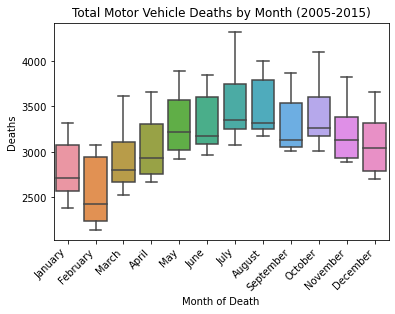

In [56]:
total_deaths_by_m_and_y = finalDf.groupby(['month_of_death', 'current_data_year']).size().reset_index(name='counts')
ax = sns.boxplot(x="month_of_death", y='counts', data=total_deaths_by_m_and_y)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set(xlabel='Month of Death', ylabel='Deaths')
ax.set_title("Total Motor Vehicle Deaths by Month (2005-2015)")

In [17]:
# Extract individual groups
mgroup1 = total_deaths_by_m_and_y[total_deaths_by_m_and_y["month_of_death"] == "January"]["counts"]
mgroup2 = total_deaths_by_m_and_y[total_deaths_by_m_and_y["month_of_death"] == "February"]["counts"]
mgroup3 = total_deaths_by_m_and_y[total_deaths_by_m_and_y["month_of_death"] == "March"]["counts"]
mgroup4 = total_deaths_by_m_and_y[total_deaths_by_m_and_y["month_of_death"] == "April"]["counts"]
mgroup5 = total_deaths_by_m_and_y[total_deaths_by_m_and_y["month_of_death"] == "May"]["counts"]
mgroup6 = total_deaths_by_m_and_y[total_deaths_by_m_and_y["month_of_death"] == "June"]["counts"]
mgroup7 = total_deaths_by_m_and_y[total_deaths_by_m_and_y["month_of_death"] == "July"]["counts"]
mgroup8 = total_deaths_by_m_and_y[total_deaths_by_m_and_y["month_of_death"] == "August"]["counts"]
mgroup9 = total_deaths_by_m_and_y[total_deaths_by_m_and_y["month_of_death"] == "September"]["counts"]
mgroup10 = total_deaths_by_m_and_y[total_deaths_by_m_and_y["month_of_death"] == "October"]["counts"]
mgroup11 = total_deaths_by_m_and_y[total_deaths_by_m_and_y["month_of_death"] == "November"]["counts"]
mgroup12 = total_deaths_by_m_and_y[total_deaths_by_m_and_y["month_of_death"] == "December"]["counts"]

In [18]:
#Levene's test for equal variance (acceptable for non-normal distributions)
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
stat, p = levene(mgroup1, mgroup2, mgroup3, mgroup4, mgroup5, mgroup6, mgroup7, mgroup8, mgroup9, mgroup10, mgroup11, mgroup12)
p
print(f'Levene test p-value {"{:.2e}".format(p)}')
if p<0.05:
    print(f'p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'p >= 0.05, sample variances similar enough for ANOVA')

Levene test p-value 1.00e+00
p >= 0.05, sample variances similar enough for ANOVA


In [19]:
F_onewayResult = stats.f_oneway(mgroup1, mgroup2, mgroup3, mgroup4, mgroup5, mgroup6, mgroup7, mgroup8, mgroup9, mgroup10, mgroup11, mgroup12)

print("ANOVA")
print(F_onewayResult)
if F_onewayResult.pvalue < 0.05:
    print(f'p < 0.05, can reject the null hypothesis that the sample means are equal')
else:
    print(f'p >= 0.05, cannot reject the null hypothesis that the sample means are equal')

ANOVA
F_onewayResult(statistic=7.664079847146055, pvalue=6.623693934118219e-10)
p < 0.05, can reject the null hypothesis that the sample means are equal


In [20]:
#Tukey test

#http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16_23.html


In [21]:
#For all pairwise comparisons:
#http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16_23.html


[Text(0, 0.5, 'Deaths'), Text(0.5, 0, 'Day of Week of Death')]

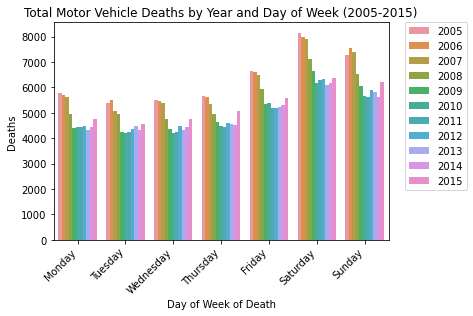

In [55]:
ax = sns.countplot(hue="current_data_year", x="day_of_week_of_death", data=finalDf)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)
ax.set_title("Total Motor Vehicle Deaths by Year and Day of Week (2005-2015)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set(xlabel='Day of Week of Death', ylabel='Deaths')
#https://stackoverflow.com/questions/27019079/move-seaborn-plot-legend-to-a-different-position

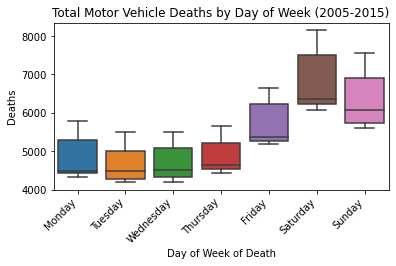

In [54]:
total_deaths_by_d_and_y = finalDf.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
#total_deaths_by_d_and_y
ax = sns.boxplot(x="day_of_week_of_death", y='counts', data=total_deaths_by_d_and_y)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_title("Total Motor Vehicle Deaths by Day of Week (2005-2015)")
ax.set(xlabel='Day of Week of Death', ylabel='Deaths')
plt.subplots_adjust(bottom=0.3)
plt.savefig('Deaths_by_day_of_week.pdf')


In [24]:


dgroup1 = total_deaths_by_d_and_y[total_deaths_by_d_and_y["day_of_week_of_death"] == "Monday"]["counts"]
dgroup2 = total_deaths_by_d_and_y[total_deaths_by_d_and_y["day_of_week_of_death"] == "Tuesday"]["counts"]
dgroup3 = total_deaths_by_d_and_y[total_deaths_by_d_and_y["day_of_week_of_death"] == "Wednesday"]["counts"]
dgroup4 = total_deaths_by_d_and_y[total_deaths_by_d_and_y["day_of_week_of_death"] == "Thursday"]["counts"]
dgroup5 = total_deaths_by_d_and_y[total_deaths_by_d_and_y["day_of_week_of_death"] == "Friday"]["counts"]
dgroup6 = total_deaths_by_d_and_y[total_deaths_by_d_and_y["day_of_week_of_death"] == "Saturday"]["counts"]
dgroup7 = total_deaths_by_d_and_y[total_deaths_by_d_and_y["day_of_week_of_death"] == "Sunday"]["counts"]


In [25]:
#Levene's test for equal variance
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
stat, p = levene(dgroup1, dgroup2, dgroup3, dgroup4, dgroup5, dgroup6, dgroup7)
p

print(f'Levene test p-value {"{:.2e}".format(p)}')
if p<0.05:
    print(f'p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'p >= 0.05, sample variances similar enough for ANOVA')

Levene test p-value 8.27e-01
p >= 0.05, sample variances similar enough for ANOVA


In [26]:
#ANOVA

stats.f_oneway(dgroup1, dgroup2, dgroup3, dgroup4, dgroup5, dgroup6, dgroup7)

print("ANOVA")
print(F_onewayResult)
if F_onewayResult.pvalue < 0.05:
    print(f'p < 0.05, can reject the null hypothesis that the sample means are equal')
else:
    print(f'p >= 0.05, cannot reject the null hypothesis that the sample means are equal')

ANOVA
F_onewayResult(statistic=7.664079847146055, pvalue=6.623693934118219e-10)
p < 0.05, can reject the null hypothesis that the sample means are equal


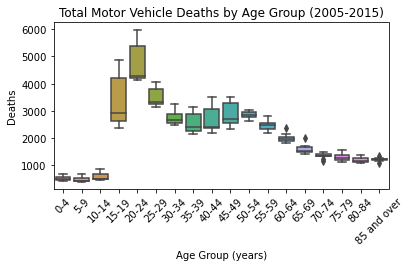

In [53]:
total_deaths_by_age_group_and_y = finalDf_with_census.groupby(['Age_group', 'current_data_year']).size().reset_index(name='counts')

ax = sns.boxplot(x="Age_group", y='counts', data=total_deaths_by_age_group_and_y)
ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("Total Motor Vehicle Deaths by Age Group (2005-2015)")
ax.set(xlabel='Age Group (years)', ylabel='Deaths')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], 
           ['0-4', '5-9', '10-14','15-19','20-24','25-29','30-34','35-39','40-44',
            '45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85 and over'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='center')
plt.subplots_adjust(bottom=0.3)
plt.savefig('Deaths_by_age_group.pdf')

In [28]:
#Count deaths in each age group

#https://stackoverflow.com/questions/58243044/extract-dataframe-from-dictionary-by-name/58243139#58243139
#Spent a zillion years trying not to have to make a list, still not there. This is ugly but works.

age_groups = finalDf_with_census['Age_group'].unique()
Age_group = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

agroup1 = total_deaths_by_age_group_and_y[total_deaths_by_age_group_and_y['Age_group'] == 1]["counts"] 
agroup2 = total_deaths_by_age_group_and_y[total_deaths_by_age_group_and_y['Age_group'] == 2]["counts"] 
agroup3 = total_deaths_by_age_group_and_y[total_deaths_by_age_group_and_y['Age_group'] == 3]["counts"] 
agroup4 = total_deaths_by_age_group_and_y[total_deaths_by_age_group_and_y['Age_group'] == 4]["counts"] 
agroup5 = total_deaths_by_age_group_and_y[total_deaths_by_age_group_and_y['Age_group'] == 5]["counts"] 
agroup6 = total_deaths_by_age_group_and_y[total_deaths_by_age_group_and_y['Age_group'] == 6]["counts"] 
agroup7 = total_deaths_by_age_group_and_y[total_deaths_by_age_group_and_y['Age_group'] == 7]["counts"] 
agroup8 = total_deaths_by_age_group_and_y[total_deaths_by_age_group_and_y['Age_group'] == 8]["counts"] 
agroup9 = total_deaths_by_age_group_and_y[total_deaths_by_age_group_and_y['Age_group'] == 9]["counts"] 
agroup10 = total_deaths_by_age_group_and_y[total_deaths_by_age_group_and_y['Age_group'] == 10]["counts"] 
agroup11 = total_deaths_by_age_group_and_y[total_deaths_by_age_group_and_y['Age_group'] == 11]["counts"] 
agroup12 = total_deaths_by_age_group_and_y[total_deaths_by_age_group_and_y['Age_group'] == 12]["counts"] 
agroup13 = total_deaths_by_age_group_and_y[total_deaths_by_age_group_and_y['Age_group'] == 13]["counts"] 
agroup14 = total_deaths_by_age_group_and_y[total_deaths_by_age_group_and_y['Age_group'] == 14]["counts"] 
agroup15 = total_deaths_by_age_group_and_y[total_deaths_by_age_group_and_y['Age_group'] == 15]["counts"] 
agroup16 = total_deaths_by_age_group_and_y[total_deaths_by_age_group_and_y['Age_group'] == 16]["counts"] 
agroup17 = total_deaths_by_age_group_and_y[total_deaths_by_age_group_and_y['Age_group'] == 17]["counts"] 
agroup18 = total_deaths_by_age_group_and_y[total_deaths_by_age_group_and_y['Age_group'] == 18]["counts"] 


In [29]:
#Levene's test for equal variance - are data suitable for ANOVA?
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

stat, p = levene(agroup1, agroup2, agroup3, agroup4, agroup5, agroup6, agroup7, agroup8, agroup9, agroup10, 
                 agroup11, agroup12, agroup13, agroup14, agroup15, agroup16, agroup17, agroup18)
#p

print(f'Levene test p-value {"{:.2e}".format(p)}')
if p<0.05:
    print(f'p<0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'p>=0.05, sample variances similar enough for ANOVA')

Levene test p-value 5.79e-09
p<0.05, sample variances too dissimilar for ANOVA


In [30]:
#Kruskal-Wallis H-test: Are differences among groups significant?
KruskalResult = stats.kruskal(agroup1, agroup2, agroup3, agroup4, agroup5, agroup6, agroup7, agroup8, agroup9, agroup10, agroup11, agroup12, agroup13, agroup14, agroup15, agroup16, agroup17, agroup18)
print(KruskalResult)
if p<0.05:
    print(f'p<0.05, can reject the null hypothesis that all group medians are equal')
else:
    print(f'p>=0.05, cannot reject the null hypothesis that all groups medians are equal')
#Low p value suggests can reject the null hypothesis that all groups are equal.

KruskalResult(statistic=183.1345619935263, pvalue=6.844750103042643e-30)
p<0.05, can reject the null hypothesis that all group medians are equal


In [31]:
#Can ANOVA test for differences among weekdays be run on age groups individually?

#Count deaths by age group, year, and day

total_deaths_by_age_group_y_and_day = finalDf_with_census.groupby(['Age_group', 'current_data_year', 'day_of_week_of_death']).size().reset_index(name='counts')
total_deaths_by_age_group_y_and_day

,Age_group,current_data_year,day_of_week_of_death,counts
0,1,2005,Monday,99
1,1,2005,Tuesday,78
2,1,2005,Wednesday,62
3,1,2005,Thursday,81
4,1,2005,Friday,107
...,...,...,...,...
1381,18,2015,Wednesday,179
1382,18,2015,Thursday,195
1383,18,2015,Friday,207
1384,18,2015,Saturday,190


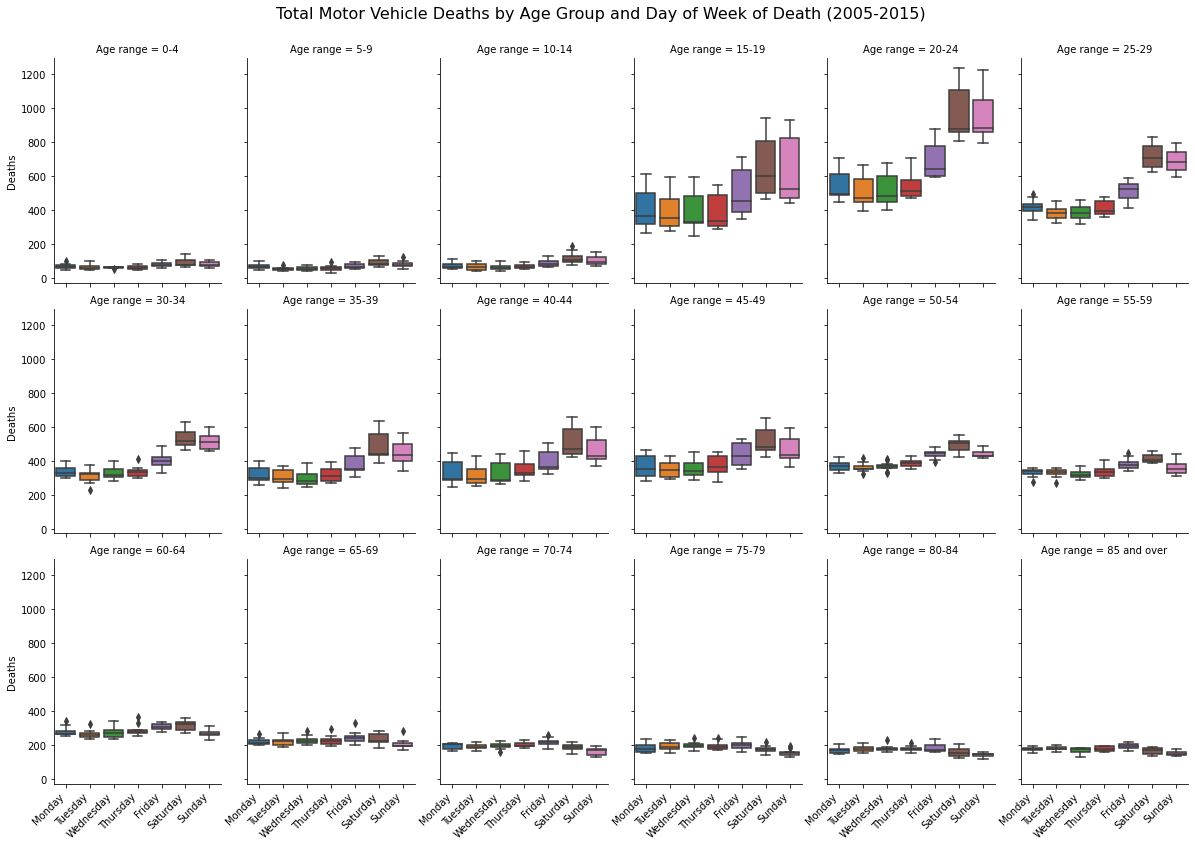

In [86]:
#Plot age groups individually

total_deaths_by_age_group_y_and_day['Age range'] = total_deaths_by_age_group_y_and_day['Age_group'].replace({1:'0-4', 2:'5-9', 3:'10-14', 4:'15-19', 5:'20-24', 6:'25-29', 7:'30-34', 8:'35-39', 9:'40-44',10:'45-49',11:'50-54', 12:'55-59' , 13:'60-64', 14:'65-69', 15:'70-74', 16:'75-79', 17:'80-84', 18:'85 and over'})

ax = sns.catplot(x="day_of_week_of_death", y="counts",
                col="Age range", col_wrap=6,
                data=total_deaths_by_age_group_y_and_day, kind="box",
                height=4, aspect=.7);
ax.set_axis_labels("", "Deaths")
ax.set_xticklabels(rotation=45, horizontalalignment='right')
plt.subplots_adjust(top=0.92, bottom=0.08)
ax.fig.suptitle('Total Motor Vehicle Deaths by Age Group and Day of Week of Death (2005-2015)', fontsize=16) 
plt.savefig('Deaths_by_age_group_and_day_of_week.pdf')
#https://stackoverflow.com/questions/43920341/python-seaborn-facetgrid-change-titles

In [33]:
#grouped = df.groupby(df.Name)
#Tanya = grouped.get_group("Tanya")

grouped_by_age_group = finalDf_with_census.groupby(finalDf_with_census.Age_group)

Age_group_1 = grouped_by_age_group.get_group(1)
Age_group_2 = grouped_by_age_group.get_group(2)
Age_group_3 = grouped_by_age_group.get_group(3)
Age_group_4 = grouped_by_age_group.get_group(4)
Age_group_5 = grouped_by_age_group.get_group(5)
Age_group_6 = grouped_by_age_group.get_group(6)
Age_group_7 = grouped_by_age_group.get_group(7)
Age_group_8 = grouped_by_age_group.get_group(8)
Age_group_9 = grouped_by_age_group.get_group(9)
Age_group_10 = grouped_by_age_group.get_group(10)
Age_group_11 = grouped_by_age_group.get_group(11)
Age_group_12 = grouped_by_age_group.get_group(12)
Age_group_13 = grouped_by_age_group.get_group(13)
Age_group_14 = grouped_by_age_group.get_group(14)
Age_group_15 = grouped_by_age_group.get_group(15)
Age_group_16 = grouped_by_age_group.get_group(16)
Age_group_17 = grouped_by_age_group.get_group(17)
Age_group_18 = grouped_by_age_group.get_group(18)

Age_group_1_df_by_y_and_day = Age_group_1.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_group_2_df_by_y_and_day = Age_group_2.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_group_3_df_by_y_and_day = Age_group_3.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_group_4_df_by_y_and_day = Age_group_4.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_group_5_df_by_y_and_day = Age_group_5.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_group_6_df_by_y_and_day = Age_group_6.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_group_7_df_by_y_and_day = Age_group_7.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_group_8_df_by_y_and_day = Age_group_8.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_group_9_df_by_y_and_day = Age_group_9.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_group_10_df_by_y_and_day = Age_group_10.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_group_11_df_by_y_and_day = Age_group_11.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_group_12_df_by_y_and_day = Age_group_12.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_group_13_df_by_y_and_day = Age_group_13.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_group_14_df_by_y_and_day = Age_group_14.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_group_15_df_by_y_and_day = Age_group_15.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_group_16_df_by_y_and_day = Age_group_16.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_group_17_df_by_y_and_day = Age_group_17.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_group_18_df_by_y_and_day = Age_group_18.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')



In [34]:
#Levene's test for equal variance
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

Age_group_1_Mon = Age_group_1_df_by_y_and_day[Age_group_1_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_group_1_Tue = Age_group_1_df_by_y_and_day[Age_group_1_df_by_y_and_day['day_of_week_of_death'] == "Tuesday"]["counts"]
Age_group_1_Wed = Age_group_1_df_by_y_and_day[Age_group_1_df_by_y_and_day['day_of_week_of_death'] == "Wednesday"]["counts"]
Age_group_1_Thu = Age_group_1_df_by_y_and_day[Age_group_1_df_by_y_and_day['day_of_week_of_death'] == "Thursday"]["counts"]
Age_group_1_Fri = Age_group_1_df_by_y_and_day[Age_group_1_df_by_y_and_day['day_of_week_of_death'] == "Friday"]["counts"]
Age_group_1_Sat = Age_group_1_df_by_y_and_day[Age_group_1_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_group_1_Sun = Age_group_1_df_by_y_and_day[Age_group_1_df_by_y_and_day['day_of_week_of_death'] == "Sunday"]["counts"]

Age_group_2_Mon = Age_group_2_df_by_y_and_day[Age_group_2_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_group_2_Tue = Age_group_2_df_by_y_and_day[Age_group_2_df_by_y_and_day['day_of_week_of_death'] == "Tuesday"]["counts"]
Age_group_2_Wed = Age_group_2_df_by_y_and_day[Age_group_2_df_by_y_and_day['day_of_week_of_death'] == "Wednesday"]["counts"]
Age_group_2_Thu = Age_group_2_df_by_y_and_day[Age_group_2_df_by_y_and_day['day_of_week_of_death'] == "Thursday"]["counts"]
Age_group_2_Fri = Age_group_2_df_by_y_and_day[Age_group_2_df_by_y_and_day['day_of_week_of_death'] == "Friday"]["counts"]
Age_group_2_Sat = Age_group_2_df_by_y_and_day[Age_group_2_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_group_2_Sun = Age_group_2_df_by_y_and_day[Age_group_2_df_by_y_and_day['day_of_week_of_death'] == "Sunday"]["counts"]

Age_group_3_Mon = Age_group_3_df_by_y_and_day[Age_group_3_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_group_3_Tue = Age_group_3_df_by_y_and_day[Age_group_3_df_by_y_and_day['day_of_week_of_death'] == "Tuesday"]["counts"]
Age_group_3_Wed = Age_group_3_df_by_y_and_day[Age_group_3_df_by_y_and_day['day_of_week_of_death'] == "Wednesday"]["counts"]
Age_group_3_Thu = Age_group_3_df_by_y_and_day[Age_group_3_df_by_y_and_day['day_of_week_of_death'] == "Thursday"]["counts"]
Age_group_3_Fri = Age_group_3_df_by_y_and_day[Age_group_3_df_by_y_and_day['day_of_week_of_death'] == "Friday"]["counts"]
Age_group_3_Sat = Age_group_3_df_by_y_and_day[Age_group_3_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_group_3_Sun = Age_group_3_df_by_y_and_day[Age_group_3_df_by_y_and_day['day_of_week_of_death'] == "Sunday"]["counts"]

Age_group_4_Mon = Age_group_4_df_by_y_and_day[Age_group_4_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_group_4_Tue = Age_group_4_df_by_y_and_day[Age_group_4_df_by_y_and_day['day_of_week_of_death'] == "Tuesday"]["counts"]
Age_group_4_Wed = Age_group_4_df_by_y_and_day[Age_group_4_df_by_y_and_day['day_of_week_of_death'] == "Wednesday"]["counts"]
Age_group_4_Thu = Age_group_4_df_by_y_and_day[Age_group_4_df_by_y_and_day['day_of_week_of_death'] == "Thursday"]["counts"]
Age_group_4_Fri = Age_group_4_df_by_y_and_day[Age_group_4_df_by_y_and_day['day_of_week_of_death'] == "Friday"]["counts"]
Age_group_4_Sat = Age_group_4_df_by_y_and_day[Age_group_4_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_group_4_Sun = Age_group_4_df_by_y_and_day[Age_group_4_df_by_y_and_day['day_of_week_of_death'] == "Sunday"]["counts"]

Age_group_5_Mon = Age_group_5_df_by_y_and_day[Age_group_5_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_group_5_Tue = Age_group_5_df_by_y_and_day[Age_group_5_df_by_y_and_day['day_of_week_of_death'] == "Tuesday"]["counts"]
Age_group_5_Wed = Age_group_5_df_by_y_and_day[Age_group_5_df_by_y_and_day['day_of_week_of_death'] == "Wednesday"]["counts"]
Age_group_5_Thu = Age_group_5_df_by_y_and_day[Age_group_5_df_by_y_and_day['day_of_week_of_death'] == "Thursday"]["counts"]
Age_group_5_Fri = Age_group_5_df_by_y_and_day[Age_group_5_df_by_y_and_day['day_of_week_of_death'] == "Friday"]["counts"]
Age_group_5_Sat = Age_group_5_df_by_y_and_day[Age_group_5_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_group_5_Sun = Age_group_5_df_by_y_and_day[Age_group_5_df_by_y_and_day['day_of_week_of_death'] == "Sunday"]["counts"]

Age_group_6_Mon = Age_group_6_df_by_y_and_day[Age_group_6_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_group_6_Tue = Age_group_6_df_by_y_and_day[Age_group_6_df_by_y_and_day['day_of_week_of_death'] == "Tuesday"]["counts"]
Age_group_6_Wed = Age_group_6_df_by_y_and_day[Age_group_6_df_by_y_and_day['day_of_week_of_death'] == "Wednesday"]["counts"]
Age_group_6_Thu = Age_group_6_df_by_y_and_day[Age_group_6_df_by_y_and_day['day_of_week_of_death'] == "Thursday"]["counts"]
Age_group_6_Fri = Age_group_6_df_by_y_and_day[Age_group_6_df_by_y_and_day['day_of_week_of_death'] == "Friday"]["counts"]
Age_group_6_Sat = Age_group_6_df_by_y_and_day[Age_group_6_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_group_6_Sun = Age_group_6_df_by_y_and_day[Age_group_6_df_by_y_and_day['day_of_week_of_death'] == "Sunday"]["counts"]

Age_group_7_Mon = Age_group_7_df_by_y_and_day[Age_group_7_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_group_7_Tue = Age_group_7_df_by_y_and_day[Age_group_7_df_by_y_and_day['day_of_week_of_death'] == "Tuesday"]["counts"]
Age_group_7_Wed = Age_group_7_df_by_y_and_day[Age_group_7_df_by_y_and_day['day_of_week_of_death'] == "Wednesday"]["counts"]
Age_group_7_Thu = Age_group_7_df_by_y_and_day[Age_group_7_df_by_y_and_day['day_of_week_of_death'] == "Thursday"]["counts"]
Age_group_7_Fri = Age_group_7_df_by_y_and_day[Age_group_7_df_by_y_and_day['day_of_week_of_death'] == "Friday"]["counts"]
Age_group_7_Sat = Age_group_7_df_by_y_and_day[Age_group_7_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_group_7_Sun = Age_group_7_df_by_y_and_day[Age_group_7_df_by_y_and_day['day_of_week_of_death'] == "Sunday"]["counts"]

Age_group_8_Mon = Age_group_8_df_by_y_and_day[Age_group_8_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_group_8_Tue = Age_group_8_df_by_y_and_day[Age_group_8_df_by_y_and_day['day_of_week_of_death'] == "Tuesday"]["counts"]
Age_group_8_Wed = Age_group_8_df_by_y_and_day[Age_group_8_df_by_y_and_day['day_of_week_of_death'] == "Wednesday"]["counts"]
Age_group_8_Thu = Age_group_8_df_by_y_and_day[Age_group_8_df_by_y_and_day['day_of_week_of_death'] == "Thursday"]["counts"]
Age_group_8_Fri = Age_group_8_df_by_y_and_day[Age_group_8_df_by_y_and_day['day_of_week_of_death'] == "Friday"]["counts"]
Age_group_8_Sat = Age_group_8_df_by_y_and_day[Age_group_8_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_group_8_Sun = Age_group_8_df_by_y_and_day[Age_group_8_df_by_y_and_day['day_of_week_of_death'] == "Sunday"]["counts"]

Age_group_9_Mon = Age_group_9_df_by_y_and_day[Age_group_9_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_group_9_Tue = Age_group_9_df_by_y_and_day[Age_group_9_df_by_y_and_day['day_of_week_of_death'] == "Tuesday"]["counts"]
Age_group_9_Wed = Age_group_9_df_by_y_and_day[Age_group_9_df_by_y_and_day['day_of_week_of_death'] == "Wednesday"]["counts"]
Age_group_9_Thu = Age_group_9_df_by_y_and_day[Age_group_9_df_by_y_and_day['day_of_week_of_death'] == "Thursday"]["counts"]
Age_group_9_Fri = Age_group_9_df_by_y_and_day[Age_group_9_df_by_y_and_day['day_of_week_of_death'] == "Friday"]["counts"]
Age_group_9_Sat = Age_group_9_df_by_y_and_day[Age_group_9_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_group_9_Sun = Age_group_9_df_by_y_and_day[Age_group_9_df_by_y_and_day['day_of_week_of_death'] == "Sunday"]["counts"]

Age_group_10_Mon = Age_group_10_df_by_y_and_day[Age_group_10_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_group_10_Tue = Age_group_10_df_by_y_and_day[Age_group_10_df_by_y_and_day['day_of_week_of_death'] == "Tuesday"]["counts"]
Age_group_10_Wed = Age_group_10_df_by_y_and_day[Age_group_10_df_by_y_and_day['day_of_week_of_death'] == "Wednesday"]["counts"]
Age_group_10_Thu = Age_group_10_df_by_y_and_day[Age_group_10_df_by_y_and_day['day_of_week_of_death'] == "Thursday"]["counts"]
Age_group_10_Fri = Age_group_10_df_by_y_and_day[Age_group_10_df_by_y_and_day['day_of_week_of_death'] == "Friday"]["counts"]
Age_group_10_Sat = Age_group_10_df_by_y_and_day[Age_group_10_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_group_10_Sun = Age_group_10_df_by_y_and_day[Age_group_10_df_by_y_and_day['day_of_week_of_death'] == "Sunday"]["counts"]

Age_group_11_Mon = Age_group_11_df_by_y_and_day[Age_group_11_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_group_11_Tue = Age_group_11_df_by_y_and_day[Age_group_11_df_by_y_and_day['day_of_week_of_death'] == "Tuesday"]["counts"]
Age_group_11_Wed = Age_group_11_df_by_y_and_day[Age_group_11_df_by_y_and_day['day_of_week_of_death'] == "Wednesday"]["counts"]
Age_group_11_Thu = Age_group_11_df_by_y_and_day[Age_group_11_df_by_y_and_day['day_of_week_of_death'] == "Thursday"]["counts"]
Age_group_11_Fri = Age_group_11_df_by_y_and_day[Age_group_11_df_by_y_and_day['day_of_week_of_death'] == "Friday"]["counts"]
Age_group_11_Sat = Age_group_11_df_by_y_and_day[Age_group_11_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_group_11_Sun = Age_group_11_df_by_y_and_day[Age_group_11_df_by_y_and_day['day_of_week_of_death'] == "Sunday"]["counts"]

Age_group_12_Mon = Age_group_12_df_by_y_and_day[Age_group_12_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_group_12_Tue = Age_group_12_df_by_y_and_day[Age_group_12_df_by_y_and_day['day_of_week_of_death'] == "Tuesday"]["counts"]
Age_group_12_Wed = Age_group_12_df_by_y_and_day[Age_group_12_df_by_y_and_day['day_of_week_of_death'] == "Wednesday"]["counts"]
Age_group_12_Thu = Age_group_12_df_by_y_and_day[Age_group_12_df_by_y_and_day['day_of_week_of_death'] == "Thursday"]["counts"]
Age_group_12_Fri = Age_group_12_df_by_y_and_day[Age_group_12_df_by_y_and_day['day_of_week_of_death'] == "Friday"]["counts"]
Age_group_12_Sat = Age_group_12_df_by_y_and_day[Age_group_12_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_group_12_Sun = Age_group_12_df_by_y_and_day[Age_group_12_df_by_y_and_day['day_of_week_of_death'] == "Sunday"]["counts"]

Age_group_13_Mon = Age_group_13_df_by_y_and_day[Age_group_13_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_group_13_Tue = Age_group_13_df_by_y_and_day[Age_group_13_df_by_y_and_day['day_of_week_of_death'] == "Tuesday"]["counts"]
Age_group_13_Wed = Age_group_13_df_by_y_and_day[Age_group_13_df_by_y_and_day['day_of_week_of_death'] == "Wednesday"]["counts"]
Age_group_13_Thu = Age_group_13_df_by_y_and_day[Age_group_13_df_by_y_and_day['day_of_week_of_death'] == "Thursday"]["counts"]
Age_group_13_Fri = Age_group_13_df_by_y_and_day[Age_group_13_df_by_y_and_day['day_of_week_of_death'] == "Friday"]["counts"]
Age_group_13_Sat = Age_group_13_df_by_y_and_day[Age_group_13_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_group_13_Sun = Age_group_13_df_by_y_and_day[Age_group_13_df_by_y_and_day['day_of_week_of_death'] == "Sunday"]["counts"]

Age_group_14_Mon = Age_group_14_df_by_y_and_day[Age_group_14_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_group_14_Tue = Age_group_14_df_by_y_and_day[Age_group_14_df_by_y_and_day['day_of_week_of_death'] == "Tuesday"]["counts"]
Age_group_14_Wed = Age_group_14_df_by_y_and_day[Age_group_14_df_by_y_and_day['day_of_week_of_death'] == "Wednesday"]["counts"]
Age_group_14_Thu = Age_group_14_df_by_y_and_day[Age_group_14_df_by_y_and_day['day_of_week_of_death'] == "Thursday"]["counts"]
Age_group_14_Fri = Age_group_14_df_by_y_and_day[Age_group_14_df_by_y_and_day['day_of_week_of_death'] == "Friday"]["counts"]
Age_group_14_Sat = Age_group_14_df_by_y_and_day[Age_group_14_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_group_14_Sun = Age_group_14_df_by_y_and_day[Age_group_14_df_by_y_and_day['day_of_week_of_death'] == "Sunday"]["counts"]

Age_group_15_Mon = Age_group_15_df_by_y_and_day[Age_group_15_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_group_15_Tue = Age_group_15_df_by_y_and_day[Age_group_15_df_by_y_and_day['day_of_week_of_death'] == "Tuesday"]["counts"]
Age_group_15_Wed = Age_group_15_df_by_y_and_day[Age_group_15_df_by_y_and_day['day_of_week_of_death'] == "Wednesday"]["counts"]
Age_group_15_Thu = Age_group_15_df_by_y_and_day[Age_group_15_df_by_y_and_day['day_of_week_of_death'] == "Thursday"]["counts"]
Age_group_15_Fri = Age_group_15_df_by_y_and_day[Age_group_15_df_by_y_and_day['day_of_week_of_death'] == "Friday"]["counts"]
Age_group_15_Sat = Age_group_15_df_by_y_and_day[Age_group_15_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_group_15_Sun = Age_group_15_df_by_y_and_day[Age_group_15_df_by_y_and_day['day_of_week_of_death'] == "Sunday"]["counts"]

Age_group_16_Mon = Age_group_16_df_by_y_and_day[Age_group_16_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_group_16_Tue = Age_group_16_df_by_y_and_day[Age_group_16_df_by_y_and_day['day_of_week_of_death'] == "Tuesday"]["counts"]
Age_group_16_Wed = Age_group_16_df_by_y_and_day[Age_group_16_df_by_y_and_day['day_of_week_of_death'] == "Wednesday"]["counts"]
Age_group_16_Thu = Age_group_16_df_by_y_and_day[Age_group_16_df_by_y_and_day['day_of_week_of_death'] == "Thursday"]["counts"]
Age_group_16_Fri = Age_group_16_df_by_y_and_day[Age_group_16_df_by_y_and_day['day_of_week_of_death'] == "Friday"]["counts"]
Age_group_16_Sat = Age_group_16_df_by_y_and_day[Age_group_16_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_group_16_Sun = Age_group_16_df_by_y_and_day[Age_group_16_df_by_y_and_day['day_of_week_of_death'] == "Sunday"]["counts"]

Age_group_17_Mon = Age_group_17_df_by_y_and_day[Age_group_17_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_group_17_Tue = Age_group_17_df_by_y_and_day[Age_group_17_df_by_y_and_day['day_of_week_of_death'] == "Tuesday"]["counts"]
Age_group_17_Wed = Age_group_17_df_by_y_and_day[Age_group_17_df_by_y_and_day['day_of_week_of_death'] == "Wednesday"]["counts"]
Age_group_17_Thu = Age_group_17_df_by_y_and_day[Age_group_17_df_by_y_and_day['day_of_week_of_death'] == "Thursday"]["counts"]
Age_group_17_Fri = Age_group_17_df_by_y_and_day[Age_group_17_df_by_y_and_day['day_of_week_of_death'] == "Friday"]["counts"]
Age_group_17_Sat = Age_group_17_df_by_y_and_day[Age_group_17_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_group_17_Sun = Age_group_17_df_by_y_and_day[Age_group_17_df_by_y_and_day['day_of_week_of_death'] == "Sunday"]["counts"]

Age_group_18_Mon = Age_group_18_df_by_y_and_day[Age_group_18_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_group_18_Tue = Age_group_18_df_by_y_and_day[Age_group_18_df_by_y_and_day['day_of_week_of_death'] == "Tuesday"]["counts"]
Age_group_18_Wed = Age_group_18_df_by_y_and_day[Age_group_18_df_by_y_and_day['day_of_week_of_death'] == "Wednesday"]["counts"]
Age_group_18_Thu = Age_group_18_df_by_y_and_day[Age_group_18_df_by_y_and_day['day_of_week_of_death'] == "Thursday"]["counts"]
Age_group_18_Fri = Age_group_18_df_by_y_and_day[Age_group_18_df_by_y_and_day['day_of_week_of_death'] == "Friday"]["counts"]
Age_group_18_Sat = Age_group_18_df_by_y_and_day[Age_group_18_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_group_18_Sun = Age_group_18_df_by_y_and_day[Age_group_18_df_by_y_and_day['day_of_week_of_death'] == "Sunday"]["counts"]


stat, p_agroup1 = levene(Age_group_1_Mon, Age_group_1_Tue, Age_group_1_Wed, Age_group_1_Thu, Age_group_1_Fri, Age_group_1_Sat, Age_group_1_Sun)
print(f'Age_group_1 Levene test p-value {p_agroup1}')
if p_agroup1<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')
stat, p_agroup2 = levene(Age_group_2_Mon, Age_group_2_Tue, Age_group_2_Wed, Age_group_2_Thu, Age_group_2_Fri, Age_group_2_Sat, Age_group_2_Sun)
print(f'Age_group_2 Levene test p-value {p_agroup2}')
if p_agroup2<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')
stat, p_agroup3 = levene(Age_group_3_Mon, Age_group_3_Tue, Age_group_3_Wed, Age_group_3_Thu, Age_group_3_Fri, Age_group_3_Sat, Age_group_3_Sun)
print(f'Age_group_3 Levene test p-value {p_agroup3}')
if p_agroup3<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')
stat, p_agroup4 = levene(Age_group_4_Mon, Age_group_4_Tue, Age_group_4_Wed, Age_group_4_Thu, Age_group_4_Fri, Age_group_4_Sat, Age_group_4_Sun)
print(f'Age_group_4 Levene test p-value {p_agroup4}')
if p_agroup4<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')
stat, p_agroup5 = levene(Age_group_5_Mon, Age_group_5_Tue, Age_group_5_Wed, Age_group_5_Thu, Age_group_5_Fri, Age_group_5_Sat, Age_group_5_Sun)
print(f'Age_group_5 Levene test p-value {p_agroup5}')
if p_agroup5<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')
stat, p_agroup6 = levene(Age_group_6_Mon, Age_group_6_Tue, Age_group_6_Wed, Age_group_6_Thu, Age_group_6_Fri, Age_group_6_Sat, Age_group_6_Sun)
print(f'Age_group_6 Levene test p-value {p_agroup6}')
if p_agroup6<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')
stat, p_agroup7 = levene(Age_group_7_Mon, Age_group_7_Tue, Age_group_7_Wed, Age_group_7_Thu, Age_group_7_Fri, Age_group_7_Sat, Age_group_7_Sun)
print(f'Age_group_7 Levene test p-value {p_agroup7}')
if p_agroup7<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')

stat, p_agroup8 = levene(Age_group_8_Mon, Age_group_8_Tue, Age_group_8_Wed, Age_group_8_Thu, Age_group_8_Fri, Age_group_8_Sat, Age_group_8_Sun)
print(f'Age_group_8 Levene test p-value {p_agroup8}')
if p_agroup8<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')
    
stat, p_agroup9 = levene(Age_group_9_Mon, Age_group_9_Tue, Age_group_9_Wed, Age_group_9_Thu, Age_group_9_Fri, Age_group_9_Sat, Age_group_9_Sun)
print(f'Age_group_9 Levene test p-value {p_agroup9}')
if p_agroup9<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')
    
stat, p_agroup10 = levene(Age_group_10_Mon, Age_group_10_Tue, Age_group_10_Wed, Age_group_10_Thu, Age_group_10_Fri, Age_group_10_Sat, Age_group_10_Sun)
print(f'Age_group_10 Levene test p-value {p_agroup10}')
if p_agroup10<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')
    
stat, p_agroup11 = levene(Age_group_11_Mon, Age_group_11_Tue, Age_group_11_Wed, Age_group_11_Thu, Age_group_11_Fri, Age_group_11_Sat, Age_group_11_Sun)
print(f'Age_group_11 Levene test p-value {p_agroup11}')
if p_agroup11<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')
    
stat, p_agroup12 = levene(Age_group_12_Mon, Age_group_12_Tue, Age_group_12_Wed, Age_group_12_Thu, Age_group_12_Fri, Age_group_12_Sat, Age_group_12_Sun)
print(f'Age_group_12 Levene test p-value {p_agroup12}')
if p_agroup12<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')
    
stat, p_agroup13 = levene(Age_group_13_Mon, Age_group_13_Tue, Age_group_13_Wed, Age_group_13_Thu, Age_group_13_Fri, Age_group_13_Sat, Age_group_13_Sun)
print(f'Age_group_13 Levene test p-value {p_agroup13}')
if p_agroup13<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')
    
stat, p_agroup14 = levene(Age_group_14_Mon, Age_group_14_Tue, Age_group_14_Wed, Age_group_14_Thu, Age_group_14_Fri, Age_group_14_Sat, Age_group_14_Sun)
print(f'Age_group_14 Levene test p-value {p_agroup14}')
if p_agroup14<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')
    
stat, p_agroup15 = levene(Age_group_15_Mon, Age_group_15_Tue, Age_group_15_Wed, Age_group_15_Thu, Age_group_15_Fri, Age_group_15_Sat, Age_group_15_Sun)
print(f'Age_group_15 Levene test p-value {p_agroup15}')
if p_agroup15<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')
    
stat, p_agroup16 = levene(Age_group_16_Mon, Age_group_16_Tue, Age_group_16_Wed, Age_group_16_Thu, Age_group_16_Fri, Age_group_16_Sat, Age_group_16_Sun)
print(f'Age_group_16 Levene test p-value {p_agroup16}')
if p_agroup16<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')
    
stat, p_agroup17 = levene(Age_group_17_Mon, Age_group_17_Tue, Age_group_17_Wed, Age_group_17_Thu, Age_group_17_Fri, Age_group_17_Sat, Age_group_17_Sun)
print(f'Age_group_17 Levene test p-value {p_agroup17}')
if p_agroup17<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')
    
stat, p_agroup18 = levene(Age_group_18_Mon, Age_group_18_Tue, Age_group_18_Wed, Age_group_18_Thu, Age_group_18_Fri, Age_group_18_Sat, Age_group_18_Sun)
print(f'Age_group_18 Levene test p-value {p_agroup18}')
if p_agroup18<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')
    


Age_group_1 Levene test p-value 0.08527163917454904
   p >= 0.05, sample variances similar enough for ANOVA
Age_group_2 Levene test p-value 0.5121247181209182
   p >= 0.05, sample variances similar enough for ANOVA
Age_group_3 Levene test p-value 0.38402113193527765
   p >= 0.05, sample variances similar enough for ANOVA
Age_group_4 Levene test p-value 0.47695189799858995
   p >= 0.05, sample variances similar enough for ANOVA
Age_group_5 Levene test p-value 0.6805086547824759
   p >= 0.05, sample variances similar enough for ANOVA
Age_group_6 Levene test p-value 0.1415434279988546
   p >= 0.05, sample variances similar enough for ANOVA
Age_group_7 Levene test p-value 0.5692511834902831
   p >= 0.05, sample variances similar enough for ANOVA
Age_group_8 Levene test p-value 0.4400080112744764
   p >= 0.05, sample variances similar enough for ANOVA
Age_group_9 Levene test p-value 0.9018486016155874
   p >= 0.05, sample variances similar enough for ANOVA
Age_group_10 Levene test p-value 0

In [52]:
#ANOVA

F1=stats.f_oneway(Age_group_1_Mon, Age_group_1_Tue, Age_group_1_Wed, Age_group_1_Thu, Age_group_1_Fri, Age_group_1_Sat, Age_group_1_Sun)
print(f'Age_group_1 ANOVA p-value {F1}')
if F_onewayResult.pvalue < 0.05:
    print(f'    p < 0.05, can reject the null hypothesis that the sample means are equal')
else:
    print(f'    p >= 0.05, cannot reject the null hypothesis that the sample means are equal')
    
F2=stats.f_oneway(Age_group_2_Mon, Age_group_2_Tue, Age_group_2_Wed, Age_group_2_Thu, Age_group_2_Fri, Age_group_2_Sat, Age_group_2_Sun)
print(f'Age_group_2 ANOVA p-value {F2}')
if F_onewayResult.pvalue < 0.05:
    print(f'    p < 0.05, can reject the null hypothesis that the sample means are equal')
else:
    print(f'    p >= 0.05, cannot reject the null hypothesis that the sample means are equal')
    
F3=stats.f_oneway(Age_group_3_Mon, Age_group_3_Tue, Age_group_3_Wed, Age_group_3_Thu, Age_group_3_Fri, Age_group_3_Sat, Age_group_3_Sun)
print(f'Age_group_3 ANOVA p-value {F3}')
if F_onewayResult.pvalue < 0.05:
    print(f'    p < 0.05, can reject the null hypothesis that the sample means are equal')
else:
    print(f'    p >= 0.05, cannot reject the null hypothesis that the sample means are equal')
    
F4=stats.f_oneway(Age_group_4_Mon, Age_group_4_Tue, Age_group_4_Wed, Age_group_4_Thu, Age_group_4_Fri, Age_group_4_Sat, Age_group_4_Sun)
print(f'Age_group_4 ANOVA p-value {F4}')
if F_onewayResult.pvalue < 0.05:
    print(f'    p < 0.05, can reject the null hypothesis that the sample means are equal')
else:
    print(f'    p >= 0.05, cannot reject the null hypothesis that the sample means are equal')
    
F5=stats.f_oneway(Age_group_5_Mon, Age_group_5_Tue, Age_group_5_Wed, Age_group_5_Thu, Age_group_5_Fri, Age_group_5_Sat, Age_group_5_Sun)
print(f'Age_group_5 ANOVA p-value {F5}')
if F_onewayResult.pvalue < 0.05:
    print(f'    p < 0.05, can reject the null hypothesis that the sample means are equal')
else:
    print(f'    p >= 0.05, cannot reject the null hypothesis that the sample means are equal')
    
F6=stats.f_oneway(Age_group_6_Mon, Age_group_6_Tue, Age_group_6_Wed, Age_group_6_Thu, Age_group_6_Fri, Age_group_6_Sat, Age_group_6_Sun)
print(f'Age_group_6 ANOVA p-value {F6}')
if F_onewayResult.pvalue < 0.05:
    print(f'    p < 0.05, can reject the null hypothesis that the sample means are equal')
else:
    print(f'    p >= 0.05, cannot reject the null hypothesis that the sample means are equal')
    
F7=stats.f_oneway(Age_group_7_Mon, Age_group_7_Tue, Age_group_7_Wed, Age_group_7_Thu, Age_group_7_Fri, Age_group_7_Sat, Age_group_7_Sun)
print(f'Age_group_7 ANOVA p-value {F7}')
if F_onewayResult.pvalue < 0.05:
    print(f'    p < 0.05, can reject the null hypothesis that the sample means are equal')
else:
    print(f'    p >= 0.05, cannot reject the null hypothesis that the sample means are equal')
    
F8=stats.f_oneway(Age_group_8_Mon, Age_group_8_Tue, Age_group_8_Wed, Age_group_8_Thu, Age_group_8_Fri, Age_group_8_Sat, Age_group_8_Sun)
print(f'Age_group_8 ANOVA p-value {F8}')
if F_onewayResult.pvalue < 0.05:
    print(f'    p < 0.05, can reject the null hypothesis that the sample means are equal')
else:
    print(f'    p >= 0.05, cannot reject the null hypothesis that the sample means are equal')
    
F9=stats.f_oneway(Age_group_9_Mon, Age_group_9_Tue, Age_group_9_Wed, Age_group_9_Thu, Age_group_9_Fri, Age_group_9_Sat, Age_group_9_Sun)
print(f'Age_group_9 ANOVA p-value {F9}')
if F_onewayResult.pvalue < 0.05:
    print(f'    p < 0.05, can reject the null hypothesis that the sample means are equal')
else:
    print(f'    p >= 0.05, cannot reject the null hypothesis that the sample means are equal')
    
F10=stats.f_oneway(Age_group_10_Mon, Age_group_10_Tue, Age_group_10_Wed, Age_group_10_Thu, Age_group_10_Fri, Age_group_10_Sat, Age_group_10_Sun)
print(f'Age_group_10 ANOVA p-value {F10}')
if F_onewayResult.pvalue < 0.05:
    print(f'    p < 0.05, can reject the null hypothesis that the sample means are equal')
else:
    print(f'    p >= 0.05, cannot reject the null hypothesis that the sample means are equal')
    
F11=stats.f_oneway(Age_group_11_Mon, Age_group_11_Tue, Age_group_11_Wed, Age_group_11_Thu, Age_group_11_Fri, Age_group_11_Sat, Age_group_11_Sun)
print(f'Age_group_11 ANOVA p-value {F11}')
if F_onewayResult.pvalue < 0.05:
    print(f'    p < 0.05, can reject the null hypothesis that the sample means are equal')
else:
    print(f'    p >= 0.05, cannot reject the null hypothesis that the sample means are equal')
    
F12=stats.f_oneway(Age_group_12_Mon, Age_group_12_Tue, Age_group_12_Wed, Age_group_12_Thu, Age_group_12_Fri, Age_group_12_Sat, Age_group_12_Sun)
print(f'Age_group_12 ANOVA p-value {F12}')
if F_onewayResult.pvalue < 0.05:
    print(f'    p < 0.05, can reject the null hypothesis that the sample means are equal')
else:
    print(f'    p >= 0.05, cannot reject the null hypothesis that the sample means are equal')
    
F13=stats.f_oneway(Age_group_13_Mon, Age_group_13_Tue, Age_group_13_Wed, Age_group_13_Thu, Age_group_13_Fri, Age_group_13_Sat, Age_group_13_Sun)
print(f'Age_group_13 ANOVA p-value {F13}')
if F_onewayResult.pvalue < 0.05:
    print(f'    p < 0.05, can reject the null hypothesis that the sample means are equal')
else:
    print(f'    p >= 0.05, cannot reject the null hypothesis that the sample means are equal')
    
F14=stats.f_oneway(Age_group_14_Mon, Age_group_14_Tue, Age_group_14_Wed, Age_group_14_Thu, Age_group_14_Fri, Age_group_14_Sat, Age_group_14_Sun)
print(f'Age_group_14 ANOVA p-value {F14}')
if F_onewayResult.pvalue < 0.05:
    print(f'    p < 0.05, can reject the null hypothesis that the sample means are equal')
else:
    print(f'    p >= 0.05, cannot reject the null hypothesis that the sample means are equal')
    
F15=stats.f_oneway(Age_group_15_Mon, Age_group_15_Tue, Age_group_15_Wed, Age_group_15_Thu, Age_group_15_Fri, Age_group_15_Sat, Age_group_15_Sun)
print(f'Age_group_15 ANOVA p-value {F15}')
if F_onewayResult.pvalue < 0.05:
    print(f'    p < 0.05, can reject the null hypothesis that the sample means are equal')
else:
    print(f'    p >= 0.05, cannot reject the null hypothesis that the sample means are equal')
    
F16=stats.f_oneway(Age_group_16_Mon, Age_group_16_Tue, Age_group_16_Wed, Age_group_16_Thu, Age_group_16_Fri, Age_group_16_Sat, Age_group_16_Sun)
print(f'Age_group_16 ANOVA p-value {F16}')
if F_onewayResult.pvalue < 0.05:
    print(f'    p < 0.05, can reject the null hypothesis that the sample means are equal')
else:
    print(f'    p >= 0.05, cannot reject the null hypothesis that the sample means are equal')
    
F17=stats.f_oneway(Age_group_17_Mon, Age_group_17_Tue, Age_group_17_Wed, Age_group_17_Thu, Age_group_17_Fri, Age_group_17_Sat, Age_group_17_Sun)
print(f'Age_group_17 ANOVA p-value {F17}')
if F_onewayResult.pvalue < 0.05:
    print(f'    p < 0.05, can reject the null hypothesis that the sample means are equal')
else:
    print(f'    p >= 0.05, cannot reject the null hypothesis that the sample means are equal')
    
F18=stats.f_oneway(Age_group_18_Mon, Age_group_18_Tue, Age_group_18_Wed, Age_group_18_Thu, Age_group_18_Fri, Age_group_18_Sat, Age_group_18_Sun)
print(f'Age_group_18 ANOVA p-value {F18}')
if F_onewayResult.pvalue < 0.05:
    print(f'    p < 0.05, can reject the null hypothesis that the sample means are equal')
else:
    print(f'    p >= 0.05, cannot reject the null hypothesis that the sample means are equal')

Age_group_1 ANOVA p-value F_onewayResult(statistic=6.038559287497871, pvalue=3.937273727264724e-05)
    p < 0.05, can reject the null hypothesis that the sample means are equal
Age_group_2 ANOVA p-value F_onewayResult(statistic=7.856672863284717, pvalue=1.7471895921222808e-06)
    p < 0.05, can reject the null hypothesis that the sample means are equal
Age_group_3 ANOVA p-value F_onewayResult(statistic=8.30935384546267, pvalue=8.331530502935884e-07)
    p < 0.05, can reject the null hypothesis that the sample means are equal
Age_group_4 ANOVA p-value F_onewayResult(statistic=7.143056006180369, pvalue=5.774892402072314e-06)
    p < 0.05, can reject the null hypothesis that the sample means are equal
Age_group_5 ANOVA p-value F_onewayResult(statistic=33.99968358020157, pvalue=6.804166324988346e-19)
    p < 0.05, can reject the null hypothesis that the sample means are equal
Age_group_6 ANOVA p-value F_onewayResult(statistic=72.28602547997387, pvalue=5.004179740067529e-28)
    p < 0.05, c

In [126]:
finalDf_with_census

,month_of_death,sex,detail_age,day_of_week_of_death,current_data_year,manner_of_death,358_cause_recode,Age_group,Age,Both_sexes,Male,Female
0,January,M,76,Thursday,2010,Accident,397- Other and unspecified motor vehicle acci...,16,75 to 79 years,7319818.0,3186724.0,4133094.0
1,January,M,19,Friday,2010,Accident,396- Occupant of special-use motor vehicle in...,4,15 to 19 years,21981099.0,11277894.0,10703205.0
2,January,M,58,Sunday,2010,Accident,397- Other and unspecified motor vehicle acci...,12,55 to 59 years,19793660.0,9587000.0,10206660.0
3,February,M,43,Monday,2010,Accident,397- Other and unspecified motor vehicle acci...,9,40 to 44 years,20903209.0,10399313.0,10503896.0
4,January,M,55,Saturday,2010,Accident,397- Other and unspecified motor vehicle acci...,12,55 to 59 years,19793660.0,9587000.0,10206660.0
...,...,...,...,...,...,...,...,...,...,...,...,...
417980,December,M,11,Friday,2012,Accident,397- Other and unspecified motor vehicle acci...,3,10 to 14 years,20669745.0,10560199.0,10109546.0
417981,December,M,47,Saturday,2012,Accident,"393- Occupant of car, pickup truck or van inv...",10,45 to 49 years,21684685.0,10719863.0,10964822.0
417982,December,M,21,Saturday,2012,Accident,397- Other and unspecified motor vehicle acci...,5,20 to 24 years,22585960.0,11542727.0,11043233.0
417983,December,F,25,Sunday,2012,Accident,395- Occupant of motor vehicle involved in no...,6,25 to 29 years,21384448.0,10821489.0,10562959.0


In [128]:
#replace({1:'0-4', 2:'5-9', 3:'10-14', 4:'15-19', 5:'20-24', 6:'25-29', 7:'30-34', 8:'35-39', 9:'40-44',10:'45-49',11:'50-54', 12:'55-59' , 13:'60-64', 14:'65-69', 15:'70-74', 16:'75-79', 17:'80-84', 18:'85 and over'})

#ax = sns.catplot(x="day_of_week_of_death", y="counts",



#Age subgroups for a closer look

Age_cluster_1 = ['0-4', '5-9', '10-14']
Age_cluster_2 = [4, 5, 6]
Age_cluster_3 = [7, 8, 9]
Age_cluster_4 = [10, 11, 12]
Age_cluster_5 = [13, 14, 15]
Age_cluster_6 = [16, 17, 18]

Age_cluster_1_df = finalDf_with_census[finalDf_with_census["Age"]==('0-4','5-9','10-14')]
Age_cluster_2_df = finalDf_with_census[finalDf_with_census["Age_group"].isin(Age_cluster_2)]
Age_cluster_3_df = finalDf_with_census[finalDf_with_census["Age_group"].isin(Age_cluster_3)]
Age_cluster_4_df = finalDf_with_census[finalDf_with_census["Age_group"].isin(Age_cluster_4)]
Age_cluster_5_df = finalDf_with_census[finalDf_with_census["Age_group"].isin(Age_cluster_5)]
Age_cluster_6_df = finalDf_with_census[finalDf_with_census["Age_group"].isin(Age_cluster_6)]

#Age_group_1_df_by_y_and_day = Age_group_1.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
#Age_group_2_df_by_y_and_day = Age_group_2.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')

Age_cluster_1_df_by_y_and_day = Age_cluster_1.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_cluster_2_df_by_y_and_day = Age_cluster_2.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_cluster_3_df_by_y_and_day = Age_cluster_3.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_cluter_4_df_by_y_and_day = Age_cluster_4.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_cluster_5_df_by_y_and_day = Age_cluster_5.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_cluster_6_df_by_y_and_day = Age_cluster_6.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')

Age_cluster_1_Mon = Age_cluster_1_df_by_y_and_day[Age_cluster_1_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_cluster_1_Tue = Age_cluster_1_df_by_y_and_day[Age_cluster_1_df_by_y_and_day['day_of_week_of_death'] == "Tuesday"]["counts"]
Age_cluster_1_Wed = Age_cluster_1_df_by_y_and_day[Age_cluster_1_df_by_y_and_day['day_of_week_of_death'] == "Wednesday"]["counts"]
Age_cluster_1_Thu = Age_cluster_1_df_by_y_and_day[Age_cluster_1_df_by_y_and_day['day_of_week_of_death'] == "Thursday"]["counts"]
Age_cluster_1_Fri = Age_cluster_1_df_by_y_and_day[Age_cluster_1_df_by_y_and_day['day_of_week_of_death'] == "Friday"]["counts"]
Age_cluster_1_Sat = Age_cluster_1_df_by_y_and_day[Age_cluster_1_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_cluster_1_Sun = Age_cluster_1_df_by_y_and_day[Age_cluster_1_df_by_y_and_day['day_of_week_of_death'] == "Sunday"]["counts"]

Age_cluster_2_Mon = Age_cluster_2_df_by_y_and_day[Age_cluster_2_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_cluster_2_Tue = Age_cluster_2_df_by_y_and_day[Age_cluster_2_df_by_y_and_day['day_of_week_of_death'] == "Tuesday"]["counts"]
Age_cluster_2_Wed = Age_cluster_2_df_by_y_and_day[Age_cluster_2_df_by_y_and_day['day_of_week_of_death'] == "Wednesday"]["counts"]
Age_cluster_2_Thu = Age_cluster_2_df_by_y_and_day[Age_cluster_2_df_by_y_and_day['day_of_week_of_death'] == "Thursday"]["counts"]
Age_cluster_2_Fri = Age_cluster_2_df_by_y_and_day[Age_cluster_2_df_by_y_and_day['day_of_week_of_death'] == "Friday"]["counts"]
Age_cluster_2_Sat = Age_cluster_2_df_by_y_and_day[Age_cluster_2_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_cluster_2_Sun = Age_cluster_2_df_by_y_and_day[Age_cluster_2_df_by_y_and_day['day_of_week_of_death'] == "Sunday"]["counts"]

Age_cluster_3_Mon = Age_cluster_3_df_by_y_and_day[Age_cluster_3_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_cluster_3_Tue = Age_cluster_3_df_by_y_and_day[Age_cluster_3_df_by_y_and_day['day_of_week_of_death'] == "Tuesday"]["counts"]
Age_cluster_3_Wed = Age_cluster_3_df_by_y_and_day[Age_cluster_3_df_by_y_and_day['day_of_week_of_death'] == "Wednesday"]["counts"]
Age_cluster_3_Thu = Age_cluster_3_df_by_y_and_day[Age_cluster_3_df_by_y_and_day['day_of_week_of_death'] == "Thursday"]["counts"]
Age_cluster_3_Fri = Age_cluster_3_df_by_y_and_day[Age_cluster_3_df_by_y_and_day['day_of_week_of_death'] == "Friday"]["counts"]
Age_cluster_3_Sat = Age_cluster_3_df_by_y_and_day[Age_cluster_3_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_cluster_3_Sun = Age_cluster_3_df_by_y_and_day[Age_cluster_3_df_by_y_and_day['day_of_week_of_death'] == "Sunday"]["counts"]

Age_cluster_4_Mon = Age_cluster_4_df_by_y_and_day[Age_cluster_4_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_cluster_4_Tue = Age_cluster_4_df_by_y_and_day[Age_cluster_4_df_by_y_and_day['day_of_week_of_death'] == "Tuesday"]["counts"]
Age_cluster_4_Wed = Age_cluster_4_df_by_y_and_day[Age_cluster_4_df_by_y_and_day['day_of_week_of_death'] == "Wednesday"]["counts"]
Age_cluster_4_Thu = Age_cluster_4_df_by_y_and_day[Age_cluster_4_df_by_y_and_day['day_of_week_of_death'] == "Thursday"]["counts"]
Age_cluster_4_Fri = Age_cluster_4_df_by_y_and_day[Age_cluster_4_df_by_y_and_day['day_of_week_of_death'] == "Friday"]["counts"]
Age_cluster_4_Sat = Age_cluster_4_df_by_y_and_day[Age_cluster_4_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_cluster_4_Sun = Age_cluster_4_df_by_y_and_day[Age_cluster_4_df_by_y_and_day['day_of_week_of_death'] == "Sunday"]["counts"]

Age_cluster_5_Mon = Age_cluster_5_df_by_y_and_day[Age_cluster_5_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_cluster_5_Tue = Age_cluster_5_df_by_y_and_day[Age_cluster_5_df_by_y_and_day['day_of_week_of_death'] == "Tuesday"]["counts"]
Age_cluster_5_Wed = Age_cluster_5_df_by_y_and_day[Age_cluster_5_df_by_y_and_day['day_of_week_of_death'] == "Wednesday"]["counts"]
Age_cluster_5_Thu = Age_cluster_5_df_by_y_and_day[Age_cluster_5_df_by_y_and_day['day_of_week_of_death'] == "Thursday"]["counts"]
Age_cluster_5_Fri = Age_cluster_5_df_by_y_and_day[Age_cluster_5_df_by_y_and_day['day_of_week_of_death'] == "Friday"]["counts"]
Age_cluster_5_Sat = Age_cluster_5_df_by_y_and_day[Age_cluster_5_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_cluster_5_Sun = Age_cluster_5_df_by_y_and_day[Age_cluster_5_df_by_y_and_day['day_of_week_of_death'] == "Sunday"]["counts"]

Age_cluster_6_Mon = Age_cluster_6_df_by_y_and_day[Age_cluster_6_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_cluster_6_Tue = Age_cluster_6_df_by_y_and_day[Age_cluster_6_df_by_y_and_day['day_of_week_of_death'] == "Tuesday"]["counts"]
Age_cluster_6_Wed = Age_cluster_6_df_by_y_and_day[Age_cluster_6_df_by_y_and_day['day_of_week_of_death'] == "Wednesday"]["counts"]
Age_cluster_6_Thu = Age_cluster_6_df_by_y_and_day[Age_cluster_6_df_by_y_and_day['day_of_week_of_death'] == "Thursday"]["counts"]
Age_cluster_6_Fri = Age_cluster_6_df_by_y_and_day[Age_cluster_6_df_by_y_and_day['day_of_week_of_death'] == "Friday"]["counts"]
Age_cluster_6_Sat = Age_cluster_6_df_by_y_and_day[Age_cluster_6_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_cluster_6_Sun = Age_cluster_6_df_by_y_and_day[Age_cluster_6_df_by_y_and_day['day_of_week_of_death'] == "Sunday"]["counts"]

stat, p_acluster1 = levene(Age_cluster_1_Mon, Age_cluster_1_Tue, Age_cluster_1_Wed, Age_cluster_1_Thu, Age_cluster_1_Fri, Age_cluster_1_Sat, Age_cluster_1_Sun)
print(f'Age_group_1 Levene test p-value {p_acluster1}')
if p_acluster1<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')
stat, p_acluster2 = levene(Age_cluster_2_Mon, Age_cluster_2_Tue, Age_cluster_2_Wed, Age_cluster_2_Thu, Age_cluster_2_Fri, Age_cluster_2_Sat, Age_cluster_2_Sun)
print(f'Age_group_2 Levene test p-value {p_acluster2}')
if p_acluster2<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')
stat, p_acluster3 = levene(Age_cluster_3_Mon, Age_cluster_3_Tue, Age_cluster_3_Wed, Age_cluster_3_Thu, Age_cluster_3_Fri, Age_cluster_3_Sat, Age_cluster_3_Sun)
print(f'Age_group_3 Levene test p-value {p_acluster3}')
if p_acluster3<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')
stat, p_acluster4 = levene(Age_cluster_4_Mon, Age_cluster_4_Tue, Age_cluster_4_Wed, Age_cluster_4_Thu, Age_cluster_4_Fri, Age_cluster_4_Sat, Age_cluster_4_Sun)
print(f'Age_group_4 Levene test p-value {p_acluster4}')
if p_acluster4<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')
stat, p_acluster5 = levene(Age_cluster_5_Mon, Age_cluster_5_Tue, Age_cluster_5_Wed, Age_cluster_5_Thu, Age_cluster_5_Fri, Age_cluster_5_Sat, Age_cluster_5_Sun)
print(f'Age_group_5 Levene test p-value {p_acluster5}')
if p_acluster5<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')
stat, p_acluster6 = levene(Age_cluster_6_Mon, Age_cluster_6_Tue, Age_cluster_6_Wed, Age_cluster_6_Thu, Age_cluster_6_Fri, Age_cluster_6_Sat, Age_cluster_6_Sun)
print(f'Age_group_6 Levene test p-value {p_acluster6}')
if p_acluster6<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')


AttributeError: 'list' object has no attribute 'groupby'

In [36]:
#Perform Bartlett’s test for equal variances - allows different lengths according to some documentation, 
#but other documentation seems to disagree...
#Bartlett’s test tests the null hypothesis that all input samples are from populations with equal variances. 
#For samples from significantly non-normal populations, Levene’s test levene is more robust.
#Parameters
#sample1, sample2,…array_like
#arrays of sample data. Only 1d arrays are accepted, they may have different lengths? But error message says not... at least
#some people in github seem to agree.... (shown here, commented out)

#MonTue = ["Monday", "Tuesday"]
#SatSun = ["Saturday", "Sunday"]

#agroup1_MonTue = agroup1_df_by_y_and_day[agroup1_df_by_y_and_day['day_of_week_of_death'] == MonTue]["counts"]
#agroup1_SatSun = agroup1_df_by_y_and_day[agroup1_df_by_y_and_day['day_of_week_of_death'] == SatSun]["counts"]

#agroup1_MonTue = agroup1_df_by_y_and_day[agroup1_df_by_y_and_day['day_of_week_of_death'] == ("Monday", "Tuesday")]["counts"]
#agroup1_SatSun = agroup1_df_by_y_and_day[agroup1_df_by_y_and_day['day_of_week_of_death'] == ("Saturday", "Sunday")]["counts"]



#stat, p_agroup1_MonTue_SatSun = bartlett(agroup1_MonTue, agroup1_SatSun)



#Okay, MondayTuesday vs. SatSun

#Levene's test for equal variance
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
#Apparently can't be done for groups of different lengths
#Mon = ["Monday"]
#Sat = ["Saturday"]

#Age_group_1_Mon = Age_group_1_df_by_y_and_day[Age_group_1_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
#Age_group_1_Sat = Age_group_1_df_by_y_and_day[Age_group_1_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
#Age_group_2_Mon = Age_group_2_df_by_y_and_day[Age_group_2_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
#Age_group_2_Sat = Age_group_2_df_by_y_and_day[Age_group_2_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
#Age_group_3_Mon = Age_group_3_df_by_y_and_day[Age_group_3_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
#Age_group_3_Sat = Age_group_3_df_by_y_and_day[Age_group_3_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
#Age_group_4_Mon = Age_group_4_df_by_y_and_day[Age_group_4_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
#Age_group_4_Sat = Age_group_4_df_by_y_and_day[Age_group_4_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
#Age_group_5_Mon = Age_group_5_df_by_y_and_day[Age_group_5_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
#Age_group_5_Sat = Age_group_5_df_by_y_and_day[Age_group_5_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
#Age_group_6_Mon = Age_group_6_df_by_y_and_day[Age_group_6_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
#Age_group_6_Sat = Age_group_6_df_by_y_and_day[Age_group_6_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
#Age_group_7_Mon = Age_group_7_df_by_y_and_day[Age_group_7_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
#Age_group_7_Sat = Age_group_7_df_by_y_and_day[Age_group_7_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
#Age_group_8_Mon = Age_group_8_df_by_y_and_day[Age_group_8_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
#Age_group_8_Sat = Age_group_8_df_by_y_and_day[Age_group_8_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
#Age_group_9_Mon = Age_group_9_df_by_y_and_day[Age_group_9_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
#Age_group_9_Sat = Age_group_9_df_by_y_and_day[Age_group_9_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
#Age_group_10_Mon = Age_group_10_df_by_y_and_day[Age_group_10_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
#Age_group_10_Sat = Age_group_10_df_by_y_and_day[Age_group_10_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
#Age_group_11_Mon = Age_group_11_df_by_y_and_day[Age_group_11_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_group_11_Sat = Age_group_11_df_by_y_and_day[Age_group_11_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_group_12_Mon = Age_group_12_df_by_y_and_day[Age_group_12_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_group_12_Sat = Age_group_12_df_by_y_and_day[Age_group_12_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_group_13_Mon = Age_group_13_df_by_y_and_day[Age_group_13_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_group_13_Sat = Age_group_13_df_by_y_and_day[Age_group_13_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_group_14_Mon = Age_group_14_df_by_y_and_day[Age_group_14_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_group_14_Sat = Age_group_14_df_by_y_and_day[Age_group_14_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_group_15_Mon = Age_group_15_df_by_y_and_day[Age_group_15_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_group_15_Sat = Age_group_15_df_by_y_and_day[Age_group_15_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_group_16_Mon = Age_group_16_df_by_y_and_day[Age_group_16_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_group_16_Sat = Age_group_16_df_by_y_and_day[Age_group_16_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_group_17_Mon = Age_group_17_df_by_y_and_day[Age_group_17_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_group_17_Sat = Age_group_17_df_by_y_and_day[Age_group_17_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_group_18_Mon = Age_group_18_df_by_y_and_day[Age_group_18_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_group_18_Sat = Age_group_18_df_by_y_and_day[Age_group_18_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]


stat, p_agroup1_Mon_Sat = levene(Age_group_1_Mon, Age_group_1_Sat)
print(f'p_agroup1_Mon_Sat Levene test p-value {p_agroup1}')
if p_agroup1<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')

stat, p_agroup2_Mon_Sat = levene(Age_group_2_Mon, Age_group_2_Sat)
print(f'p_agroup2_Mon_Sat Levene test p-value {p_agroup2}')
if p_agroup2<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')

stat, p_agroup3_Mon_Sat = levene(Age_group_3_Mon, Age_group_3_Sat)
print(f'p_agroup3_Mon_Sat Levene test p-value {p_agroup3}')
if p_agroup3<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')

stat, p_agroup4_Mon_Sat = levene(Age_group_4_Mon, Age_group_4_Sat)
print(f'p_agroup4_Mon_Sat Levene test p-value {p_agroup4}')
if p_agroup4<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')

stat, p_agroup5_Mon_Sat = levene(Age_group_5_Mon, Age_group_5_Sat)
print(f'p_agroup5_Mon_Sat Levene test p-value {p_agroup5}')
if p_agroup5<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')

stat, p_agroup6_Mon_Sat = levene(Age_group_6_Mon, Age_group_6_Sat)
print(f'p_agroup6_Mon_Sat Levene test p-value {p_agroup6}')
if p_agroup6<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')

stat, p_agroup7_Mon_Sat = levene(Age_group_7_Mon, Age_group_7_Sat)
print(f'p_agroup7_Mon_Sat Levene test p-value {p_agroup7}')
if p_agroup7<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')

stat, p_agroup8_Mon_Sat = levene(Age_group_8_Mon, Age_group_8_Sat)
print(f'p_agroup8_Mon_Sat Levene test p-value {p_agroup8}')
if p_agroup8<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')

stat, p_agroup9_Mon_Sat = levene(Age_group_9_Mon, Age_group_9_Sat)
print(f'p_agroup9_Mon_Sat Levene test p-value {p_agroup9}')
if p_agroup9<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')
    
stat, p_agroup10_Mon_Sat = levene(Age_group_10_Mon, Age_group_10_Sat)
print(f'p_agroup10_Mon_Sat Levene test p-value {p_agroup10}')
if p_agroup10<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')    
    
stat, p_agroup11_Mon_Sat = levene(Age_group_11_Mon, Age_group_11_Sat)
print(f'p_agroup11_Mon_Sat Levene test p-value {p_agroup11}')
if p_agroup11<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')    
    
stat, p_agroup12_Mon_Sat = levene(Age_group_12_Mon, Age_group_12_Sat)
print(f'p_agroup12_Mon_Sat Levene test p-value {p_agroup12}')
if p_agroup12<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')    
    
stat, p_agroup13_Mon_Sat = levene(Age_group_13_Mon, Age_group_13_Sat)
print(f'p_agroup13_Mon_Sat Levene test p-value {p_agroup13}')
if p_agroup13<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')    
    
stat, p_agroup14_Mon_Sat = levene(Age_group_14_Mon, Age_group_14_Sat)
print(f'p_agroup14_Mon_Sat Levene test p-value {p_agroup14}')
if p_agroup14<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')    
    
stat, p_agroup15_Mon_Sat = levene(Age_group_15_Mon, Age_group_15_Sat)
print(f'p_agroup15_Mon_Sat Levene test p-value {p_agroup15}')
if p_agroup15<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')    
    
stat, p_agroup16_Mon_Sat = levene(Age_group_16_Mon, Age_group_16_Sat)
print(f'p_agroup16_Mon_Sat Levene test p-value {p_agroup16}')
if p_agroup16<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')    
    
stat, p_agroup17_Mon_Sat = levene(Age_group_17_Mon, Age_group_17_Sat)
print(f'p_agroup17_Mon_Sat Levene test p-value {p_agroup17}')
if p_agroup17<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')    
    
stat, p_agroup18_Mon_Sat = levene(Age_group_18_Mon, Age_group_18_Sat)
print(f'p_agroup18_Mon_Sat Levene test p-value {p_agroup18}')
if p_agroup18<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')    


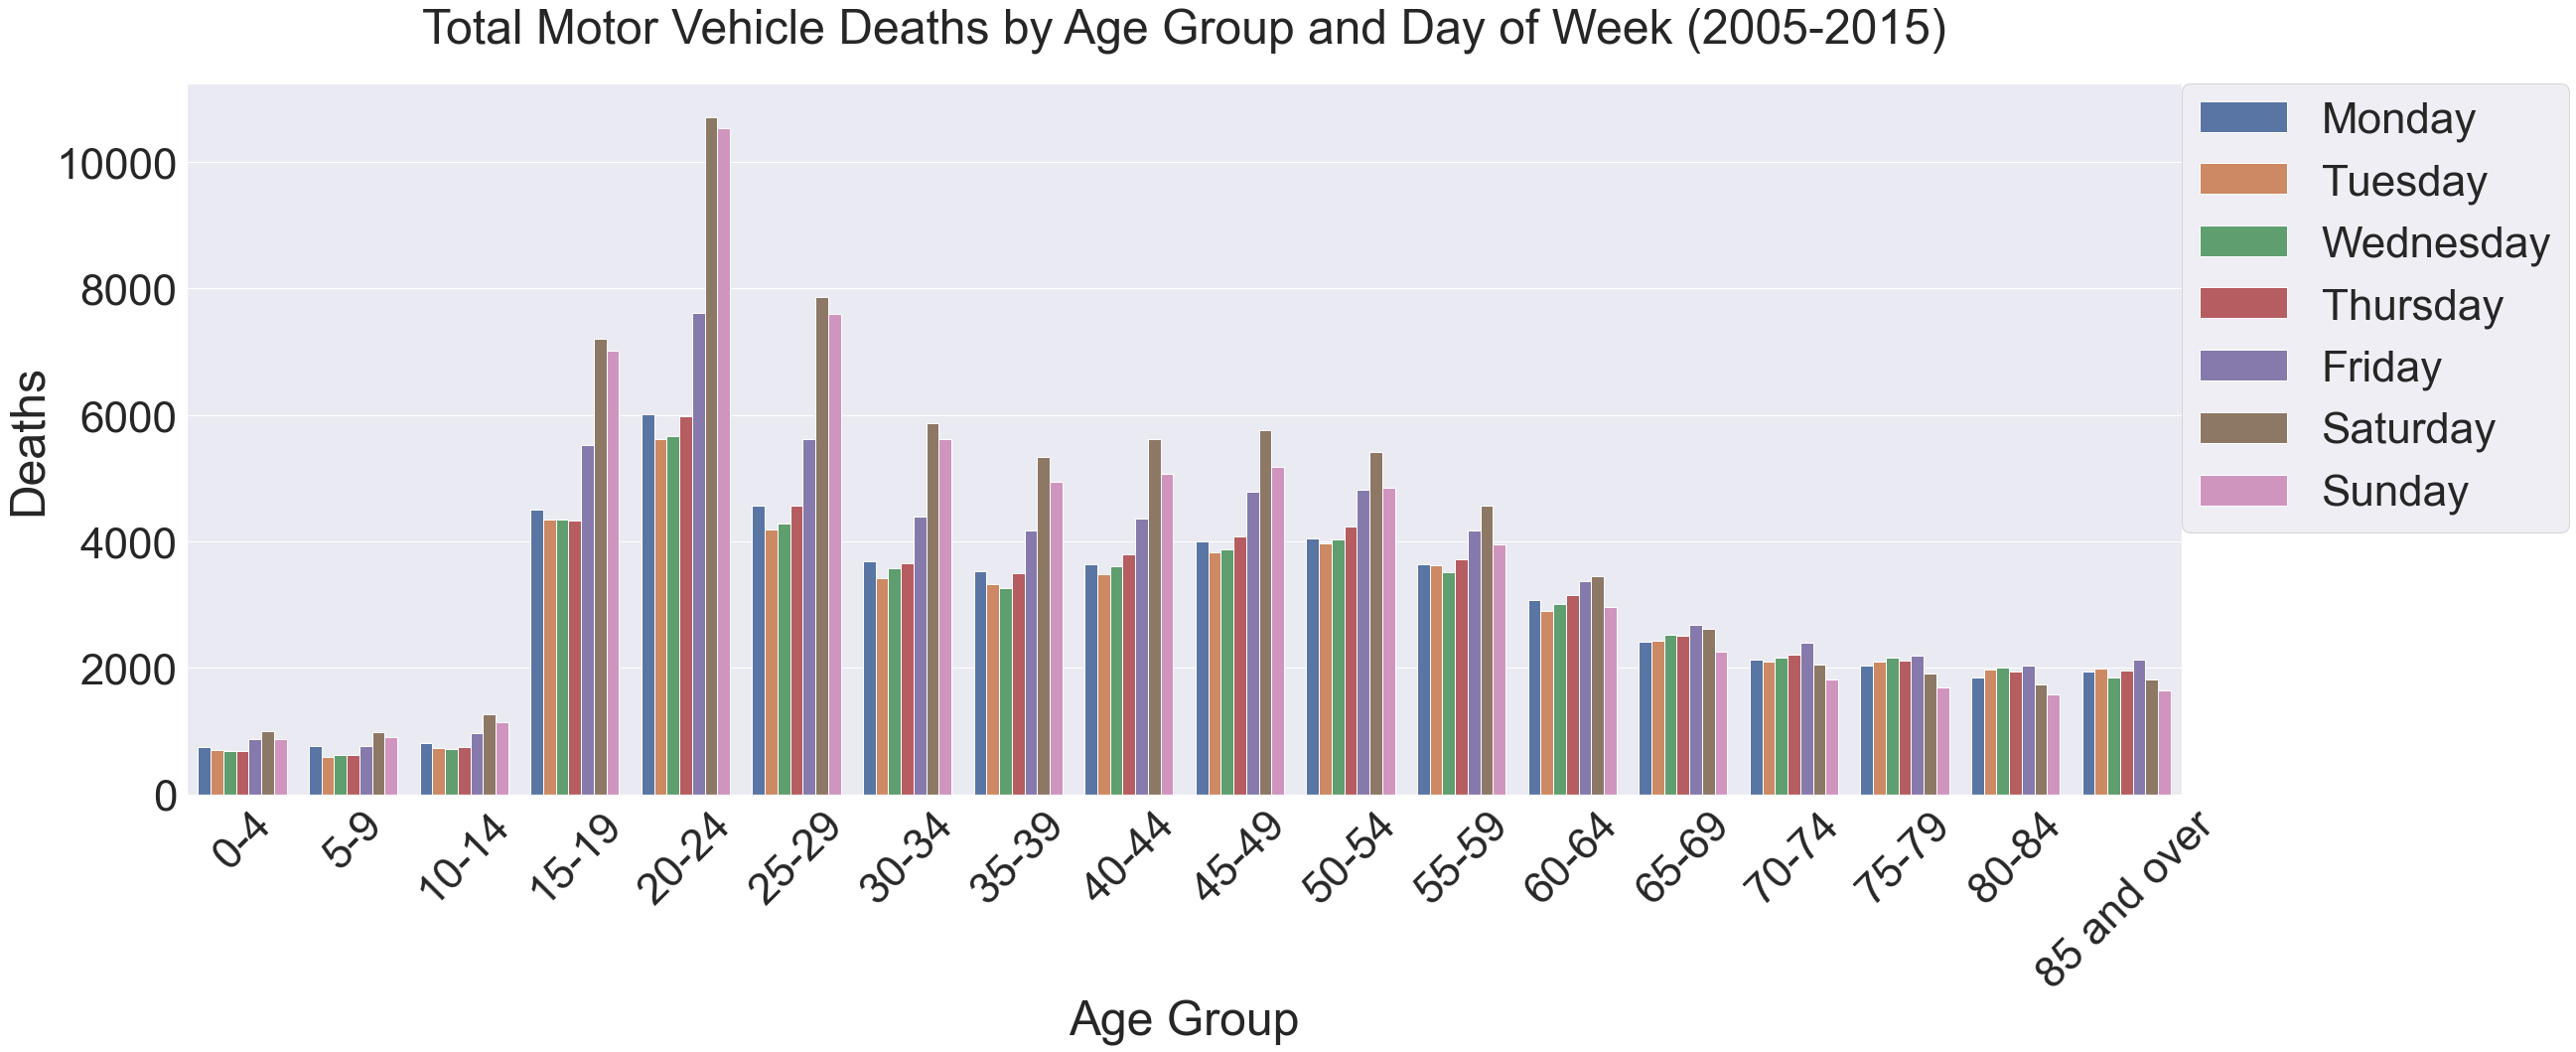

In [119]:
#order=['Sunday', 'Monday', 'Tuesday' ,'Wednesday','Thursday' ,'Friday', 'Saturday']
#cut_bins = [0,15,20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]
#finalDf['cut_age'] = pd.cut(finalDf['detail_age'], bins=cut_bins) #labels=cut_labels_4)
ax = sns.countplot(hue="day_of_week_of_death", x="Age_group", data=finalDf_with_census)
ax.legend(bbox_to_anchor=(1, 1), loc=2,borderaxespad=0.)
ax.set_title("Total Motor Vehicle Deaths by Age Group and Day of Week (2005-2015)",  y=1.05, fontsize=48)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], 
           ['0-4', '5-9', '10-14','15-19','20-24','25-29','30-34','35-39','40-44',
            '45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85 and over'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='center')
ax.set(xlabel='Age Group', ylabel='Deaths')
fig = plt.gcf()
fig.set_size_inches( 36, 12.5)
sns.set(font_scale=4)
plt.subplots_adjust(top=0.92)
plt.savefig('Deaths_by_age_group_and_day_of_week_barplot.pdf')

In [39]:
total_deaths_by_Age_group_and_weekday = finalDf.groupby(['Age_group', 'day_of_week_of_death']).size().reset_index(name='total_deaths').dropna()
#total_deaths_by_Age_group_and_weekday.dtypes
total_deaths_by_Age_group_and_weekday

,Age_group,day_of_week_of_death,total_deaths
0,1,Monday,747
1,1,Tuesday,702
2,1,Wednesday,684
3,1,Thursday,681
4,1,Friday,877
...,...,...,...
121,18,Wednesday,1853
122,18,Thursday,1959
123,18,Friday,2127
124,18,Saturday,1824


In [40]:
anova = ols('detail_age ~ day_of_week_of_death', data=finalDf_with_census).fit()
table = sm.stats.anova_lm(anova, typ=2)
table

,sum_sq,df,F,PR(>F)
day_of_week_of_death,1.867691e+06,6.0,701.412054,0.0
Residual,1.854957e+08,417978.0,NaN,NaN


In [41]:
anova = ols('Age_group ~ day_of_week_of_death', data=finalDf_with_census).fit()
table = sm.stats.anova_lm(anova, typ=2)
table

,sum_sq,df,F,PR(>F)
day_of_week_of_death,7.397436e+04,6.0,699.847351,0.0
Residual,7.363428e+06,417978.0,NaN,NaN


In [42]:
#paths = !type -a python
#for path in set(paths):
#    path = path.split()[-1]
#    print(path)
#    !{path} -c "import sys; print(sys.path)"
#    print()

[Text(0, 0.5, 'Deaths'), Text(0.5, 0, 'Age Group')]

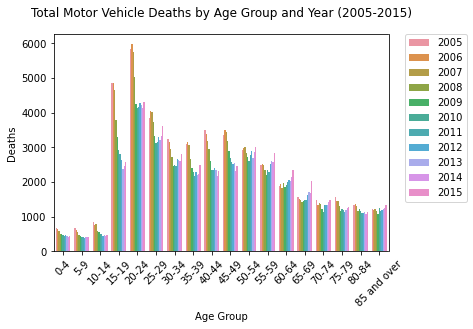

In [75]:
#order=['Sunday', 'Monday', 'Tuesday' ,'Wednesday','Thursday' ,'Friday', 'Saturday']
#cut_bins = [0,15,20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]
#finalDf['cut_age'] = pd.cut(finalDf['detail_age'], bins=cut_bins) #labels=cut_labels_4)
ax = sns.countplot(hue="current_data_year", x="Age_group", data=finalDf)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)
ax.set_title("Total Motor Vehicle Deaths by Age Group and Year (2005-2015)", y=1.05)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], 
           ['0-4', '5-9', '10-14','15-19','20-24','25-29','30-34','35-39','40-44',
            '45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85 and over'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='center')
ax.set(xlabel='Age Group', ylabel='Deaths')

[(0.0, 24000000.0)]

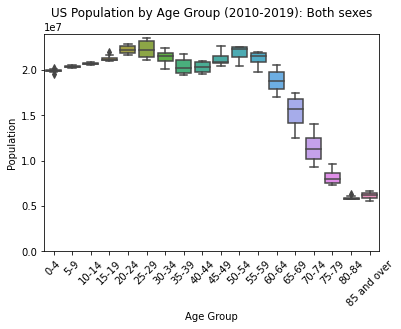

In [73]:
ax = sns.boxplot(x = 'Age_group', y = 'Both_sexes', data = census_summary_df)
ax.set_title("US Population by Age Group (2010-2019): Both sexes", y=1.05)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], 
           ['0-4', '5-9', '10-14','15-19','20-24','25-29','30-34','35-39','40-44',
            '45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85 and over'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='center')
ax.set(xlabel='Age Group', ylabel='Population')
ax.set(ylim=(0, 2.4e7))

[(0.0, 12000000.0)]

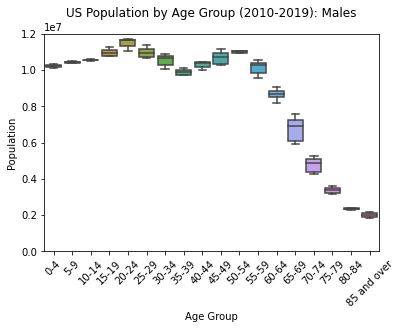

In [72]:
ax = sns.boxplot(x = 'Age_group', y = 'Male', data = finalDf_with_census)
ax.set_title("US Population by Age Group (2010-2019): Males", y=1.05)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], 
           ['0-4', '5-9', '10-14','15-19','20-24','25-29','30-34','35-39','40-44',
            '45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85 and over'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='center')
ax.set(xlabel='Age Group', ylabel='Population')
ax.set(ylim=(0, 1.2e7))

[(0.0, 12000000.0)]

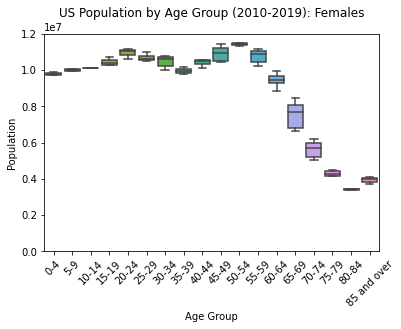

In [74]:
ax = sns.boxplot(x = 'Age_group', y = 'Female', data = finalDf_with_census)
ax.set_title("US Population by Age Group (2010-2019): Females",  y=1.05)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], 
           ['0-4', '5-9', '10-14','15-19','20-24','25-29','30-34','35-39','40-44',
            '45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85 and over'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='center')
ax.set(xlabel='Age Group', ylabel='Population')
ax.set(ylim=(0, 1.2e7))